In [1]:
# imports and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

import prepare

# supress scientific notation
np.set_printoptions(suppress=True)

import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_columns = 78
pd.options.display.max_rows = 60

# visualization settings
plt.rc('figure', figsize=(13, 7))
plt.rc('font', size=16)
plt.style.use('seaborn-whitegrid')

In [2]:
df = pd.read_csv('PlayerData.csv', index_col = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382 entries, 0 to 2087
Data columns (total 47 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   PlayerID                               382 non-null    int64  
 1   Player_Name                            382 non-null    object 
 2   Age                                    382 non-null    float64
 3   Height                                 379 non-null    float64
 4   MaxRank                                382 non-null    float64
 5   Hand                                   382 non-null    object 
 6   Country                                382 non-null    object 
 7   win_count                              382 non-null    float64
 8   lose_count                             382 non-null    float64
 9   match_count                            382 non-null    float64
 10  win%                                   382 non-null    float64
 11  aces_

In [3]:
df.sample(5)

,PlayerID,Player_Name,Age,Height,MaxRank,Hand,Country,win_count,lose_count,match_count,win%,aces_in_match_lost,aces_in_match_won,ace_count,aces_per_game,first_serve_percentage_match_lost,first_serve_percentage_match_won,first_serve_won_percentage_match_lost,first_serve_won_percentage_match_won,breakpoints_won_match_lost,breakpoints_won_match_won,breakpoint_count,breakpoints_per_game,win_count_30,loss_count_30,win_count_100,loss_count_100,total_top30_matches,total_top100_matches,top_30_win%,top_100_win%,hard_surface_win,hard_surface_loss,hard_surface_match_count,hard_win%,clay_surface_win,clay_surface_loss,clay_surface_match_count,clay_win%,grass_surface_win,grass_surface_loss,grass_surface_match_count,grass_win%,carpet_surface_win,carpet_surface_loss,carpet_surface_match_count,carpet_win%
1319,105062,Mikhail Kukushkin,31.321013,183.0,40.0,R,KAZ,108.0,142.0,250.0,0.43,415.0,394.0,809.0,3.236,0.599406,0.621275,0.614676,0.728920,239.0,436.0,675.0,2.700000,23.0,55.0,74.0,119.0,78.0,193.0,0.294872,0.383420,68.0,81.0,149.0,0.456376,27.0,42.0,69.0,0.391304,12.0,17.0,29.0,0.413793,1.0,2.0,3.0,0.333333
1581,105138,Roberto Bautista Agut,31.594798,183.0,9.0,R,ESP,214.0,124.0,338.0,0.63,312.0,746.0,1058.0,3.130,0.665521,0.661881,0.633718,0.745060,232.0,843.0,1075.0,3.180473,44.0,68.0,158.0,115.0,112.0,273.0,0.392857,0.578755,138.0,78.0,216.0,0.638889,56.0,38.0,94.0,0.595745,20.0,8.0,28.0,0.714286,0.0,0.0,0.0,0.000000
317,103294,Christophe Rochus,27.375770,170.0,38.0,R,BEL,90.0,170.0,260.0,0.35,256.0,220.0,476.0,1.831,0.595633,0.627940,0.593507,0.696924,258.0,419.0,677.0,2.603846,10.0,54.0,58.0,131.0,64.0,189.0,0.156250,0.306878,31.0,60.0,91.0,0.340659,55.0,81.0,136.0,0.404412,1.0,18.0,19.0,0.052632,3.0,11.0,14.0,0.214286
1855,106415,Yoshihito Nishioka,23.989049,170.0,60.0,L,JPN,33.0,38.0,71.0,0.46,60.0,70.0,130.0,1.831,0.627394,0.655725,0.582401,0.714500,70.0,149.0,219.0,3.084507,5.0,17.0,27.0,33.0,22.0,60.0,0.227273,0.450000,31.0,29.0,60.0,0.516667,2.0,6.0,8.0,0.250000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
583,104229,Yen Hsun Lu,31.030801,180.0,34.0,R,TPE,122.0,168.0,290.0,0.42,625.0,522.0,1147.0,3.955,0.602343,0.617414,0.648815,0.775767,241.0,408.0,649.0,2.237931,17.0,57.0,69.0,139.0,74.0,208.0,0.229730,0.331731,93.0,125.0,218.0,0.426606,5.0,16.0,21.0,0.238095,22.0,25.0,47.0,0.468085,2.0,2.0,4.0,0.500000


In [4]:
# # change df cols to lower case
# # Column names: remove white spaces and convert to lower case
# df.columns = df.columns.str.strip().str.lower()
# df.columns

In [5]:
# # get rid of spaces in the columns names
# df.player_name= df.player_name.str.replace(' ', '_')
# df.player_name= df.player_name.str.lower()
# df.player_name

In [6]:
def prep_player_data(df):
    '''
    - gets rid of capital letters in the columns' names and players name
    - substitutes ' ' for '_' in players name
    '''
    df.columns = df.columns.str.strip().str.lower()
    df.player_name= df.player_name.str.replace(' ', '_')
    df.player_name= df.player_name.str.lower()
    
    return df
    

In [7]:
df = prep_player_data(df)
df.head()

,playerid,player_name,age,height,maxrank,hand,country,win_count,lose_count,match_count,win%,aces_in_match_lost,aces_in_match_won,ace_count,aces_per_game,first_serve_percentage_match_lost,first_serve_percentage_match_won,first_serve_won_percentage_match_lost,first_serve_won_percentage_match_won,breakpoints_won_match_lost,breakpoints_won_match_won,breakpoint_count,breakpoints_per_game,win_count_30,loss_count_30,win_count_100,loss_count_100,total_top30_matches,total_top100_matches,top_30_win%,top_100_win%,hard_surface_win,hard_surface_loss,hard_surface_match_count,hard_win%,clay_surface_win,clay_surface_loss,clay_surface_match_count,clay_win%,grass_surface_win,grass_surface_loss,grass_surface_match_count,grass_win%,carpet_surface_win,carpet_surface_loss,carpet_surface_match_count,carpet_win%
0,103720,lleyton_hewitt,20.752909,180.0,1.0,R,AUS,458.0,196.0,654.0,0.70,1034.0,2823.0,3857.0,5.898,0.525558,0.539098,0.675974,0.773470,407.0,1947.0,2354.0,3.599388,134.0,110.0,351.0,184.0,244.0,535.0,0.549180,0.656075,265.0,118.0,383.0,0.691906,85.0,46.0,131.0,0.648855,93.0,27.0,120.0,0.775000,15.0,5.0,20.0,0.750000
1,102158,patrick_rafter,26.477755,185.0,2.0,R,AUS,97.0,44.0,141.0,0.69,292.0,637.0,929.0,6.589,0.637279,0.653328,0.700358,0.795185,61.0,342.0,403.0,2.858156,35.0,25.0,75.0,38.0,60.0,113.0,0.583333,0.663717,47.0,25.0,72.0,0.652778,14.0,11.0,25.0,0.560000,31.0,6.0,37.0,0.837838,5.0,2.0,7.0,0.714286
2,103017,nicolas_kiefer,22.535250,183.0,4.0,R,GER,217.0,162.0,379.0,0.57,975.0,1514.0,2489.0,6.567,0.514047,0.537990,0.689337,0.792370,240.0,836.0,1076.0,2.839050,70.0,87.0,168.0,148.0,157.0,316.0,0.445860,0.531646,141.0,88.0,229.0,0.615721,37.0,44.0,81.0,0.456790,19.0,14.0,33.0,0.575758,20.0,16.0,36.0,0.555556
3,210013,martin_damm_sr,28.227242,188.0,67.0,R,CZE,19.0,32.0,51.0,0.37,203.0,141.0,344.0,6.745,0.546553,0.611743,0.693080,0.806999,38.0,72.0,110.0,2.156863,4.0,9.0,11.0,25.0,13.0,36.0,0.307692,0.305556,9.0,16.0,25.0,0.360000,4.0,7.0,11.0,0.363636,6.0,7.0,13.0,0.461538,0.0,0.0,0.0,0.000000
4,103264,mariano_puerta,26.904860,180.0,9.0,L,ARG,76.0,79.0,155.0,0.49,272.0,273.0,545.0,3.516,0.637432,0.680268,0.613399,0.746508,93.0,272.0,365.0,2.354839,11.0,33.0,55.0,71.0,44.0,126.0,0.250000,0.436508,14.0,21.0,35.0,0.400000,61.0,48.0,109.0,0.559633,0.0,0.0,0.0,0.000000,1.0,7.0,8.0,0.125000


In [8]:
df.playerid.duplicated().sum()

0

In [9]:
# players to analise 
rivals = ['roger_federer', 'rafael_nadal', 'novak_djokovic', 'andy_murray'] # Andy Roddick is not in the df   

In [10]:
# create df of top rivals of Nadal
roger_and_rivals = df[df['player_name'].isin(['roger_federer', 'rafael_nadal', 'novak_djokovic', 'andy_murray'])]
roger_and_rivals

,playerid,player_name,age,height,maxrank,hand,country,win_count,lose_count,match_count,win%,aces_in_match_lost,aces_in_match_won,ace_count,aces_per_game,first_serve_percentage_match_lost,first_serve_percentage_match_won,first_serve_won_percentage_match_lost,first_serve_won_percentage_match_won,breakpoints_won_match_lost,breakpoints_won_match_won,breakpoint_count,breakpoints_per_game,win_count_30,loss_count_30,win_count_100,loss_count_100,total_top30_matches,total_top100_matches,top_30_win%,top_100_win%,hard_surface_win,hard_surface_loss,hard_surface_match_count,hard_win%,clay_surface_win,clay_surface_loss,clay_surface_match_count,clay_win%,grass_surface_win,grass_surface_loss,grass_surface_match_count,grass_win%,carpet_surface_win,carpet_surface_loss,carpet_surface_match_count,carpet_win%
133,103819,roger_federer,22.485969,185.0,1.0,R,SUI,907.0,212.0,1119.0,0.81,1541.0,6829.0,8370.0,7.480,0.597457,0.629201,0.701538,0.796579,391.0,3238.0,3629.0,3.243074,407.0,146.0,786.0,200.0,553.0,986.0,0.735986,0.797160,552.0,120.0,672.0,0.821429,189.0,57.0,246.0,0.768293,132.0,19.0,151.0,0.874172,34.0,16.0,50.0,0.680000
756,104745,rafael_nadal,22.228611,185.0,1.0,L,ESP,741.0,146.0,887.0,0.84,407.0,2257.0,2664.0,3.003,0.680257,0.683340,0.637243,0.748767,265.0,3207.0,3472.0,3.914318,339.0,109.0,643.0,136.0,448.0,779.0,0.756696,0.825417,354.0,101.0,455.0,0.778022,339.0,27.0,366.0,0.926230,46.0,15.0,61.0,0.754098,2.0,3.0,5.0,0.400000
997,104925,novak_djokovic,24.213552,188.0,1.0,R,SRB,670.0,143.0,813.0,0.82,605.0,3621.0,4226.0,5.198,0.635394,0.656273,0.653117,0.762887,246.0,2819.0,3065.0,3.769988,326.0,115.0,588.0,134.0,441.0,722.0,0.739229,0.814404,448.0,86.0,534.0,0.838951,156.0,45.0,201.0,0.776119,58.0,9.0,67.0,0.865672,8.0,3.0,11.0,0.727273
1075,104918,andy_murray,29.503080,190.0,1.0,R,GBR,496.0,158.0,654.0,0.76,937.0,3336.0,4273.0,6.534,0.559638,0.588219,0.668232,0.772850,331.0,2167.0,2498.0,3.819572,205.0,110.0,422.0,151.0,315.0,573.0,0.650794,0.736475,349.0,101.0,450.0,0.775556,77.0,39.0,116.0,0.663793,63.0,16.0,79.0,0.797468,7.0,2.0,9.0,0.777778


In [11]:
### create a player that is th average of rogers feder rivals 
rivals_df = df[df['player_name'].isin(['rafael_nadal', 'novak_djokovic', 'andy_murray'])]
rivals_df.mean()# will gi us the stats for the average top competitor for rafael nadal

playerid                                 104862.666667
age                                          25.315081
height                                      187.666667
maxrank                                       1.000000
win_count                                   635.666667
lose_count                                  149.000000
match_count                                 784.666667
win%                                          0.806667
aces_in_match_lost                          649.666667
aces_in_match_won                          3071.333333
ace_count                                  3721.000000
aces_per_game                                 4.911667
first_serve_percentage_match_lost             0.625097
first_serve_percentage_match_won              0.642611
first_serve_won_percentage_match_lost         0.652864
first_serve_won_percentage_match_won          0.761501
breakpoints_won_match_lost                  280.666667
breakpoints_won_match_won                  2731.000000
breakpoint

In [12]:
rivals_df.mean().to_dict() 

{'playerid': 104862.66666666667,
 'age': 25.315080994733336,
 'height': 187.66666666666666,
 'maxrank': 1.0,
 'win_count': 635.6666666666666,
 'lose_count': 149.0,
 'match_count': 784.6666666666666,
 'win%': 0.8066666666666666,
 'aces_in_match_lost': 649.6666666666666,
 'aces_in_match_won': 3071.3333333333335,
 'ace_count': 3721.0,
 'aces_per_game': 4.911666666666666,
 'first_serve_percentage_match_lost': 0.6250965559162417,
 'first_serve_percentage_match_won': 0.6426108624641352,
 'first_serve_won_percentage_match_lost': 0.6528640987300323,
 'first_serve_won_percentage_match_won': 0.7615012329145713,
 'breakpoints_won_match_lost': 280.6666666666667,
 'breakpoints_won_match_won': 2731.0,
 'breakpoint_count': 3011.6666666666665,
 'breakpoints_per_game': 3.834625830304102,
 'win_count_30': 290.0,
 'loss_count_30': 111.33333333333333,
 'win_count_100': 551.0,
 'loss_count_100': 140.33333333333334,
 'total_top30_matches': 401.3333333333333,
 'total_top100_matches': 691.3333333333334,
 'top

In [13]:
# create the record of a player that is the average of the Nadals competition
median_record = rivals_df.mean().to_dict() 

# add record to dataframe 
roger_and_rivals = roger_and_rivals.append(median_record, ignore_index=True)

In [14]:
# # Change the name for the created player 
# roger_and_rivals['player_name'] = roger_and_rivals['player_name'].fillna('median_player', inplace=True)

In [15]:
roger_and_rivals

,playerid,player_name,age,height,maxrank,hand,country,win_count,lose_count,match_count,win%,aces_in_match_lost,aces_in_match_won,ace_count,aces_per_game,first_serve_percentage_match_lost,first_serve_percentage_match_won,first_serve_won_percentage_match_lost,first_serve_won_percentage_match_won,breakpoints_won_match_lost,breakpoints_won_match_won,breakpoint_count,breakpoints_per_game,win_count_30,loss_count_30,win_count_100,loss_count_100,total_top30_matches,total_top100_matches,top_30_win%,top_100_win%,hard_surface_win,hard_surface_loss,hard_surface_match_count,hard_win%,clay_surface_win,clay_surface_loss,clay_surface_match_count,clay_win%,grass_surface_win,grass_surface_loss,grass_surface_match_count,grass_win%,carpet_surface_win,carpet_surface_loss,carpet_surface_match_count,carpet_win%
0,103819.000000,roger_federer,22.485969,185.000000,1.0,R,SUI,907.000000,212.0,1119.000000,0.810000,1541.000000,6829.000000,8370.0,7.480000,0.597457,0.629201,0.701538,0.796579,391.000000,3238.0,3629.000000,3.243074,407.0,146.000000,786.0,200.000000,553.000000,986.000000,0.735986,0.797160,552.000000,120.0,672.000000,0.821429,189.000000,57.0,246.000000,0.768293,132.000000,19.000000,151.0,0.874172,34.000000,16.000000,50.000000,0.680000
1,104745.000000,rafael_nadal,22.228611,185.000000,1.0,L,ESP,741.000000,146.0,887.000000,0.840000,407.000000,2257.000000,2664.0,3.003000,0.680257,0.683340,0.637243,0.748767,265.000000,3207.0,3472.000000,3.914318,339.0,109.000000,643.0,136.000000,448.000000,779.000000,0.756696,0.825417,354.000000,101.0,455.000000,0.778022,339.000000,27.0,366.000000,0.926230,46.000000,15.000000,61.0,0.754098,2.000000,3.000000,5.000000,0.400000
2,104925.000000,novak_djokovic,24.213552,188.000000,1.0,R,SRB,670.000000,143.0,813.000000,0.820000,605.000000,3621.000000,4226.0,5.198000,0.635394,0.656273,0.653117,0.762887,246.000000,2819.0,3065.000000,3.769988,326.0,115.000000,588.0,134.000000,441.000000,722.000000,0.739229,0.814404,448.000000,86.0,534.000000,0.838951,156.000000,45.0,201.000000,0.776119,58.000000,9.000000,67.0,0.865672,8.000000,3.000000,11.000000,0.727273
3,104918.000000,andy_murray,29.503080,190.000000,1.0,R,GBR,496.000000,158.0,654.000000,0.760000,937.000000,3336.000000,4273.0,6.534000,0.559638,0.588219,0.668232,0.772850,331.000000,2167.0,2498.000000,3.819572,205.0,110.000000,422.0,151.000000,315.000000,573.000000,0.650794,0.736475,349.000000,101.0,450.000000,0.775556,77.000000,39.0,116.000000,0.663793,63.000000,16.000000,79.0,0.797468,7.000000,2.000000,9.000000,0.777778
4,104862.666667,NaN,25.315081,187.666667,1.0,NaN,NaN,635.666667,149.0,784.666667,0.806667,649.666667,3071.333333,3721.0,4.911667,0.625097,0.642611,0.652864,0.761501,280.666667,2731.0,3011.666667,3.834626,290.0,111.333333,551.0,140.333333,401.333333,691.333333,0.715573,0.792099,383.666667,96.0,479.666667,0.797510,190.666667,37.0,227.666667,0.788714,55.666667,13.333333,69.0,0.805746,5.666667,2.666667,8.333333,0.635017


In [16]:
roger_and_rivals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 47 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   playerid                               5 non-null      float64
 1   player_name                            4 non-null      object 
 2   age                                    5 non-null      float64
 3   height                                 5 non-null      float64
 4   maxrank                                5 non-null      float64
 5   hand                                   4 non-null      object 
 6   country                                4 non-null      object 
 7   win_count                              5 non-null      float64
 8   lose_count                             5 non-null      float64
 9   match_count                            5 non-null      float64
 10  win%                                   5 non-null      float64
 11  aces_in_ma

In [17]:
# change player id data type
# when adding mean_rival data types conflict
roger_and_rivals['playerid'] = roger_and_rivals.playerid.astype(int)
roger_and_rivals['maxrank'] = roger_and_rivals.maxrank.astype(int)
roger_and_rivals['player_name'] = roger_and_rivals.player_name.astype(str)

In [18]:
roger_and_rivals['hand'] = roger_and_rivals.hand.astype(str)
roger_and_rivals['country'] = roger_and_rivals.country.astype(str)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382 entries, 0 to 2087
Data columns (total 47 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   playerid                               382 non-null    int64  
 1   player_name                            382 non-null    object 
 2   age                                    382 non-null    float64
 3   height                                 379 non-null    float64
 4   maxrank                                382 non-null    float64
 5   hand                                   382 non-null    object 
 6   country                                382 non-null    object 
 7   win_count                              382 non-null    float64
 8   lose_count                             382 non-null    float64
 9   match_count                            382 non-null    float64
 10  win%                                   382 non-null    float64
 11  aces_

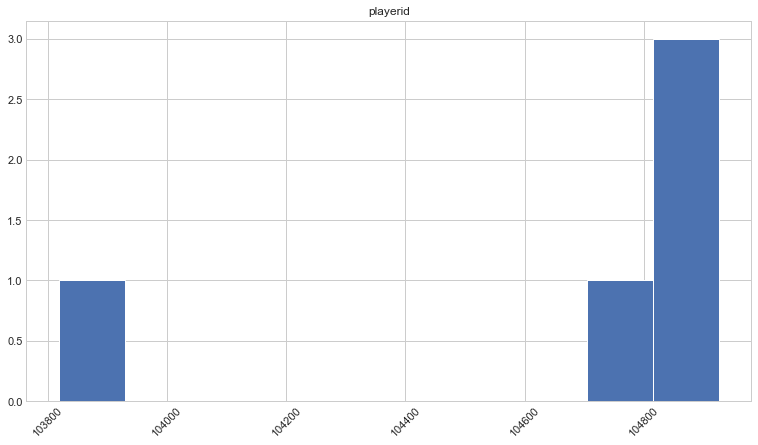

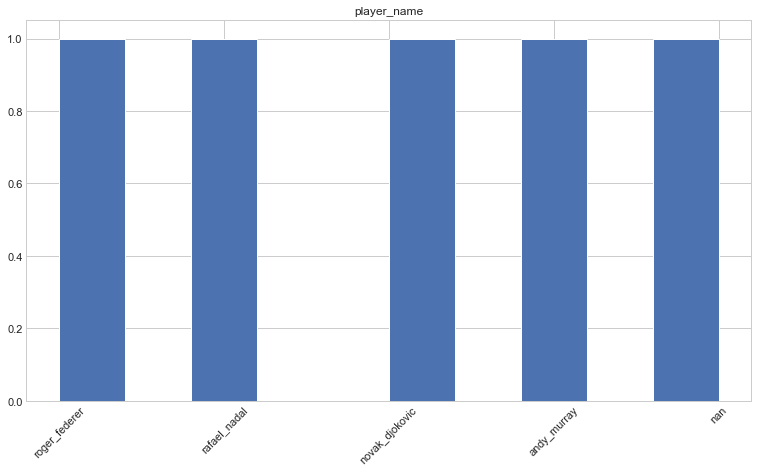

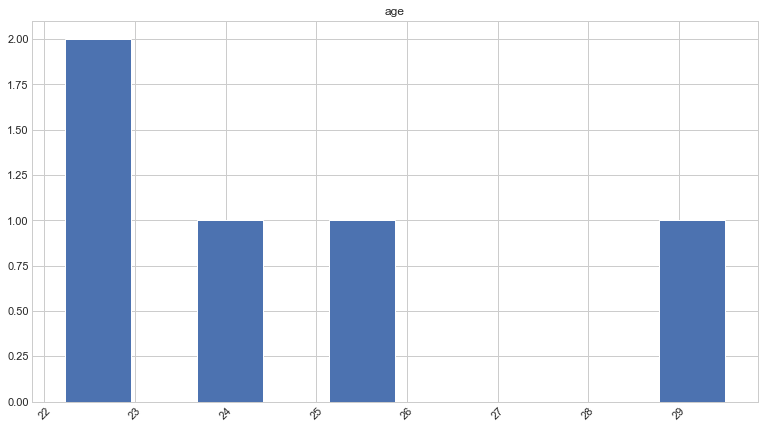

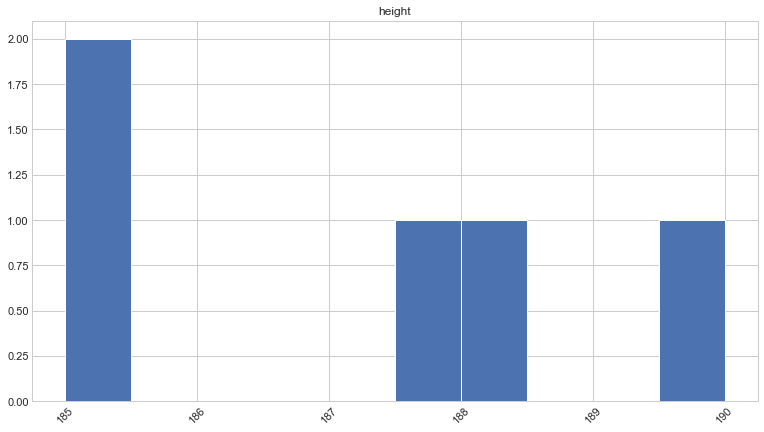

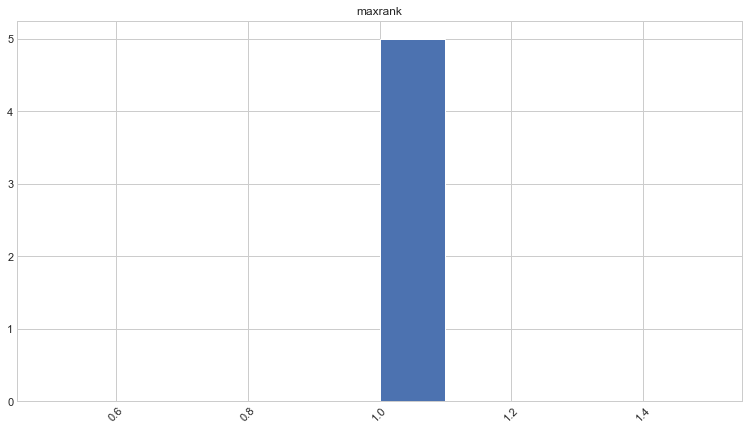

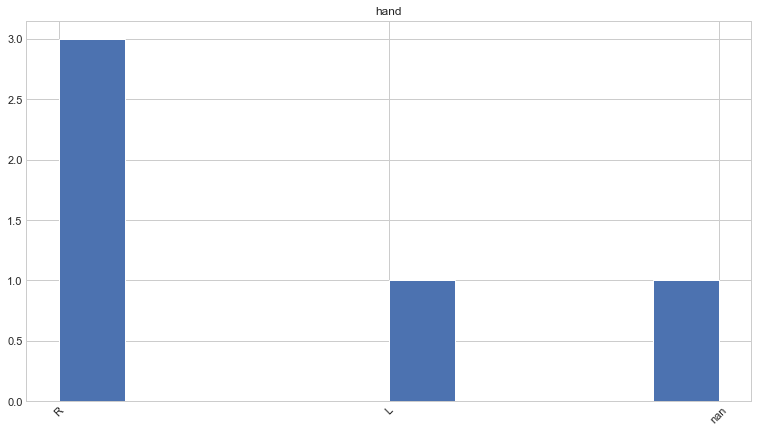

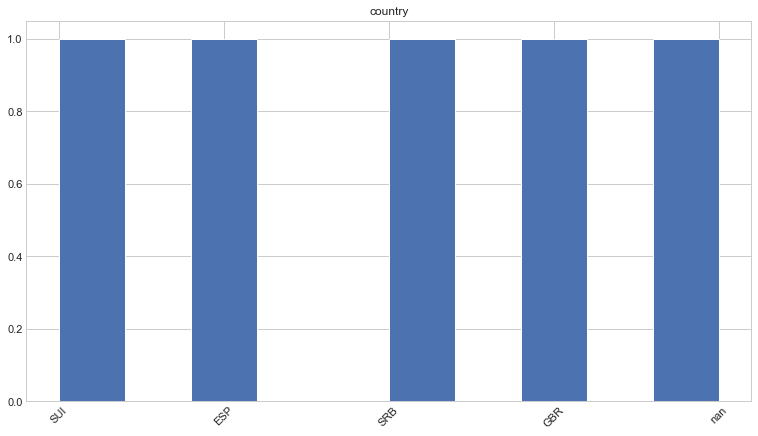

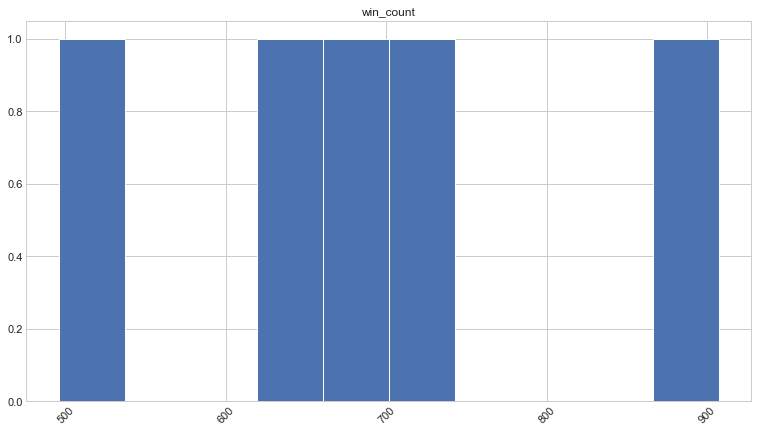

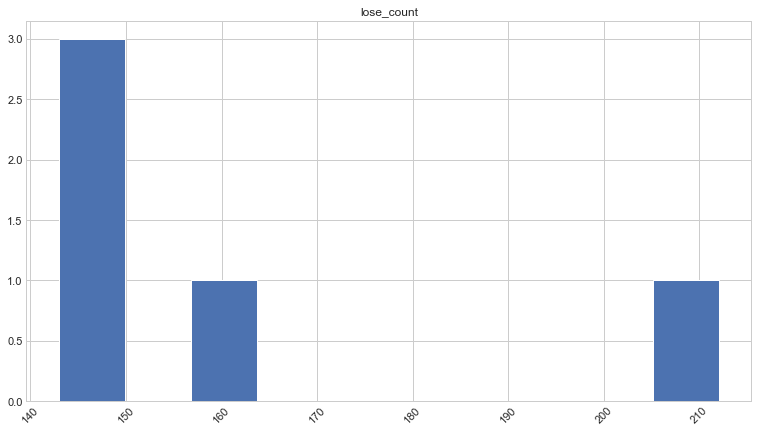

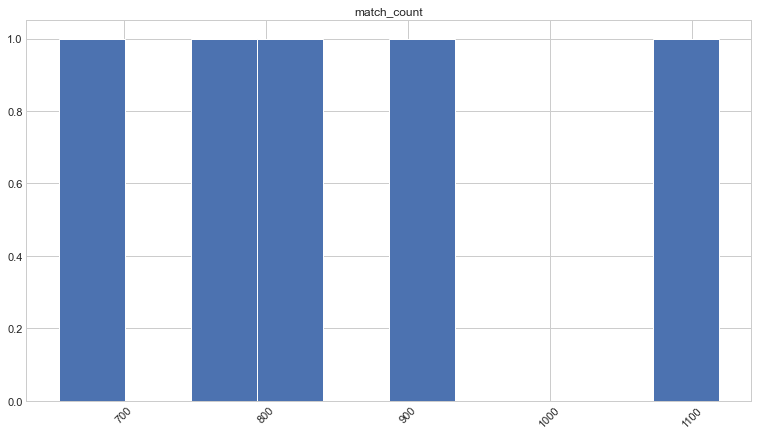

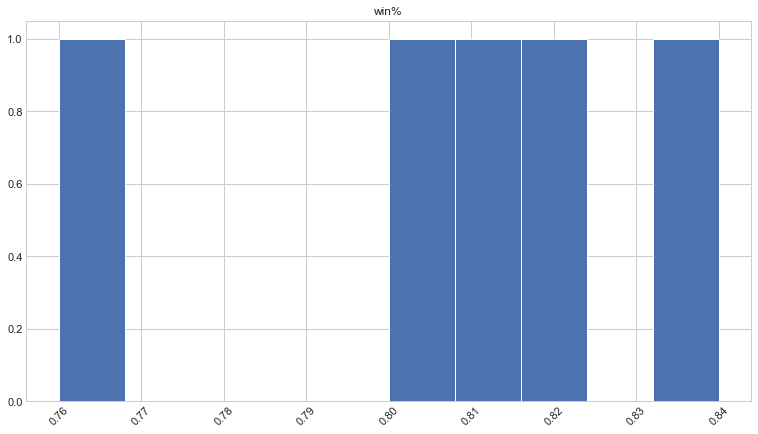

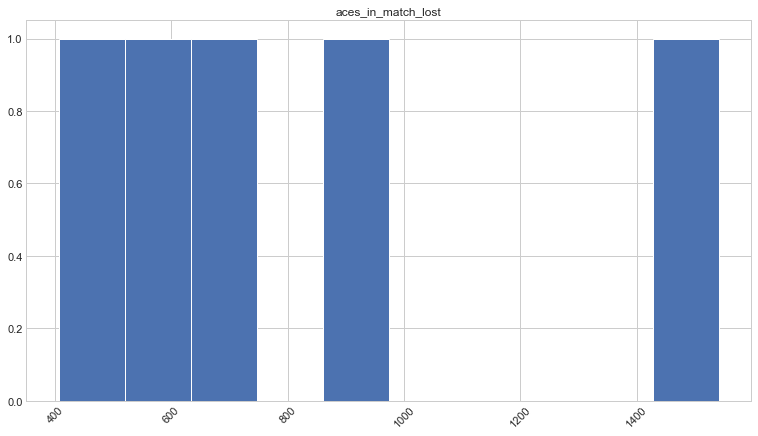

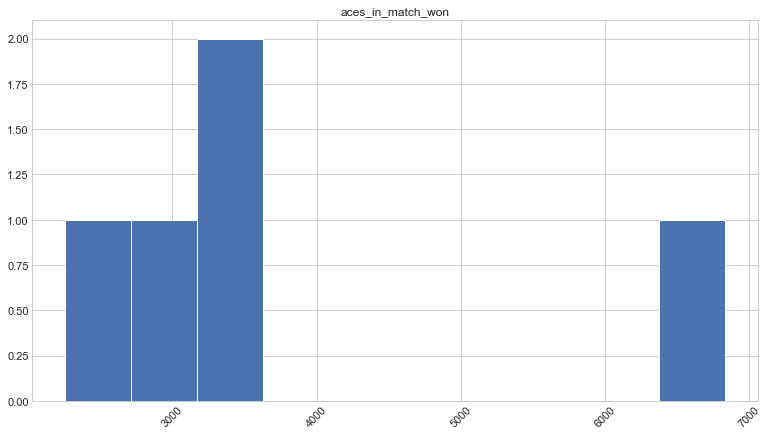

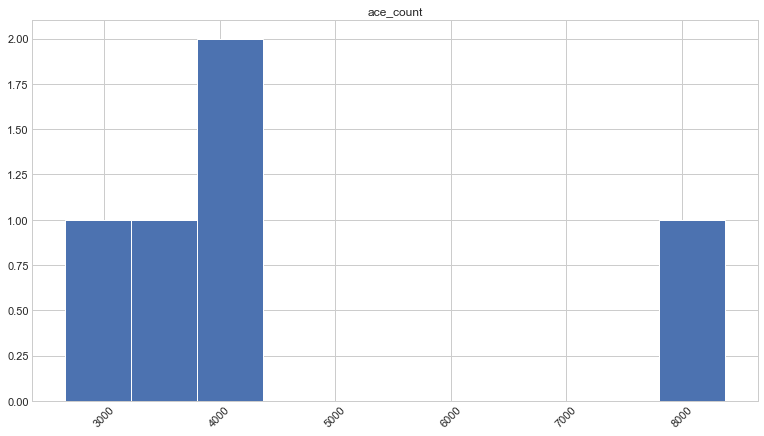

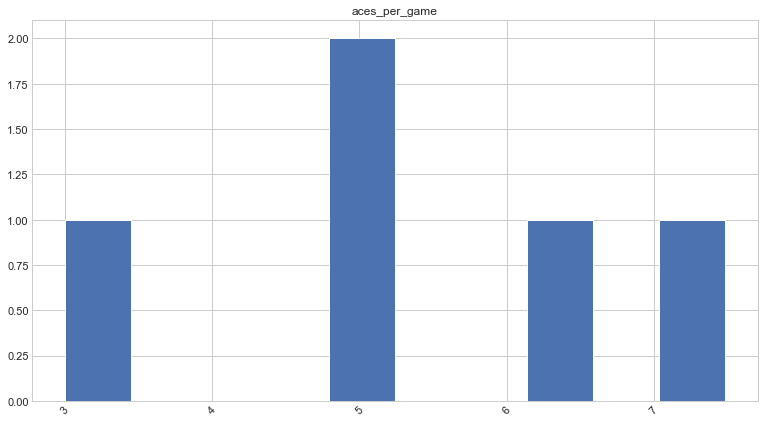

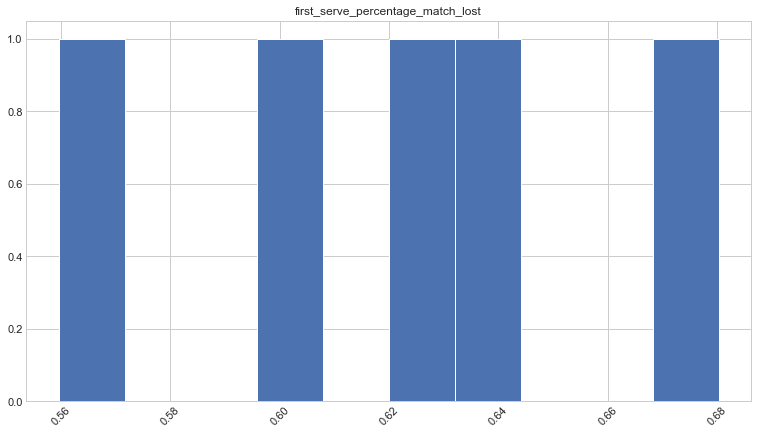

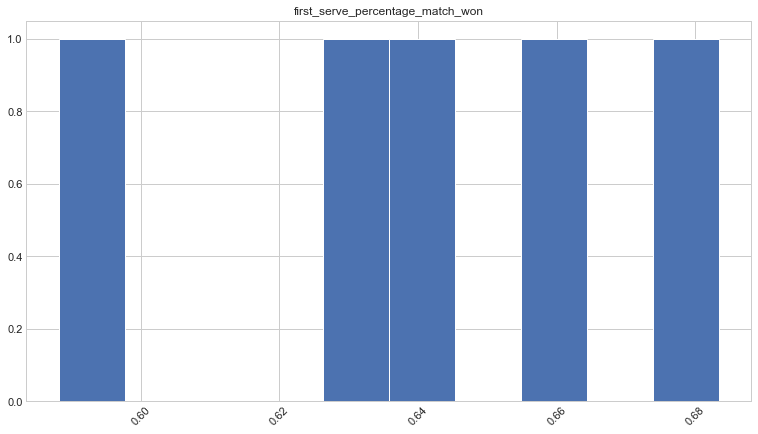

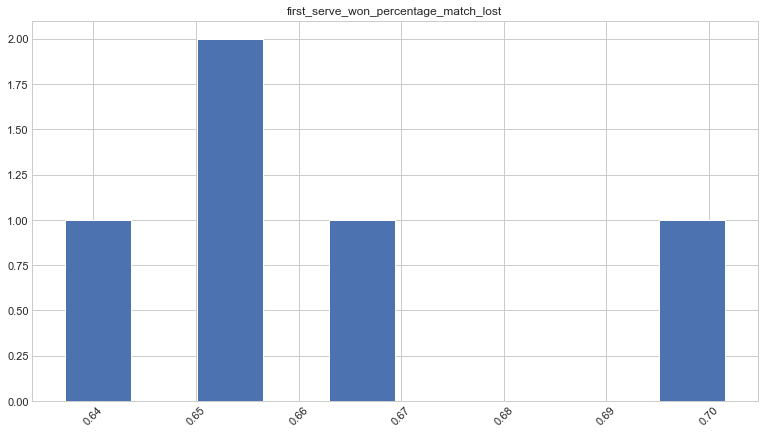

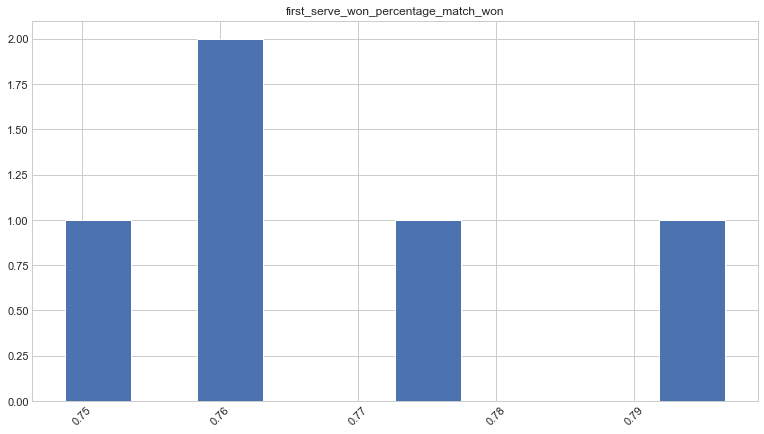

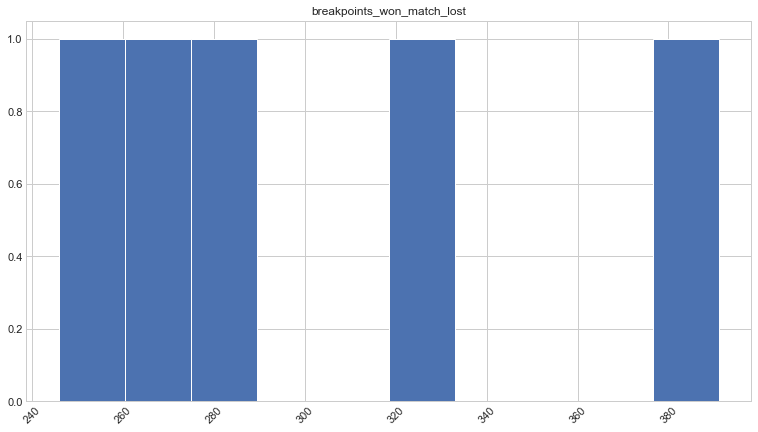

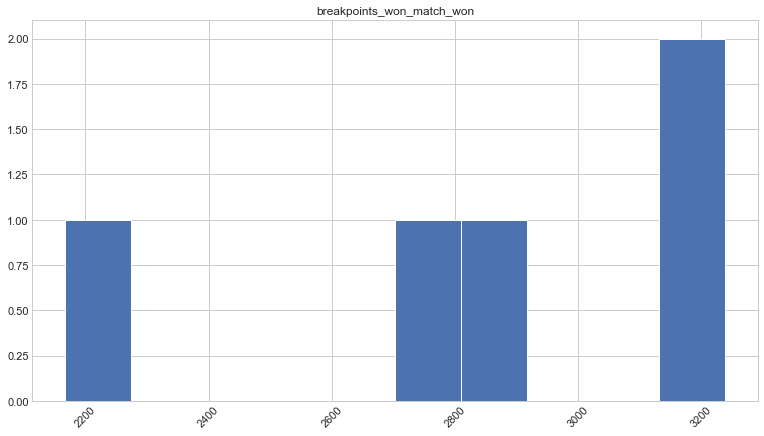

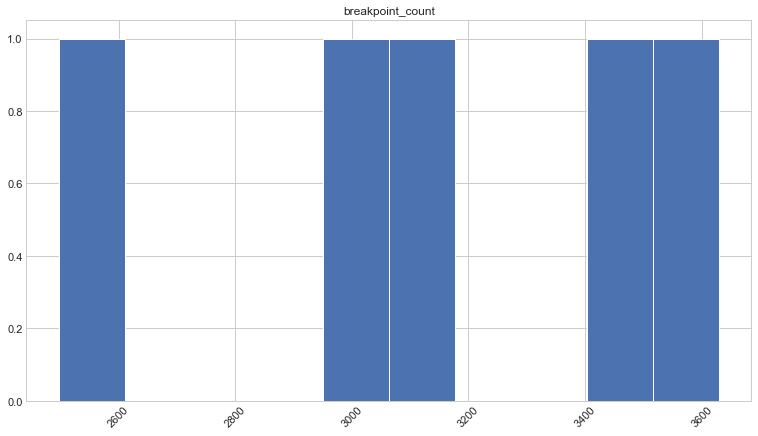

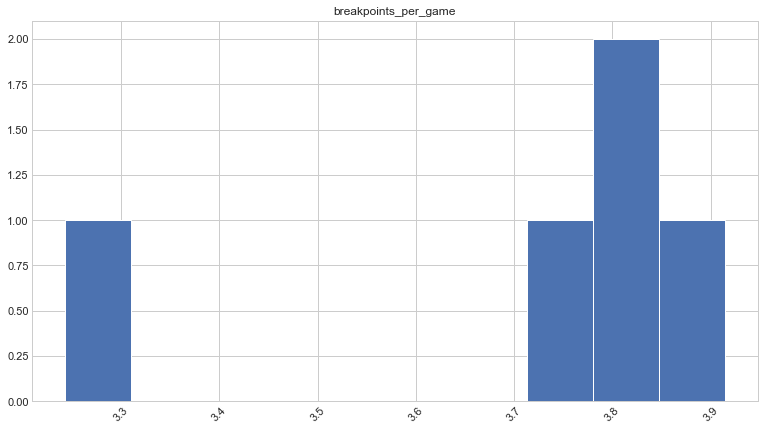

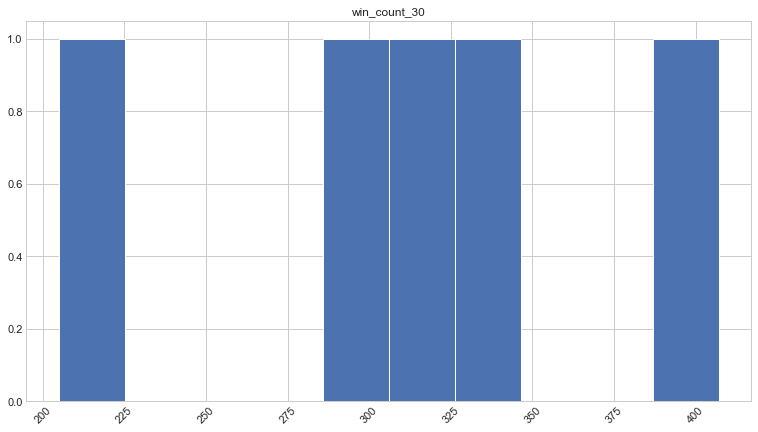

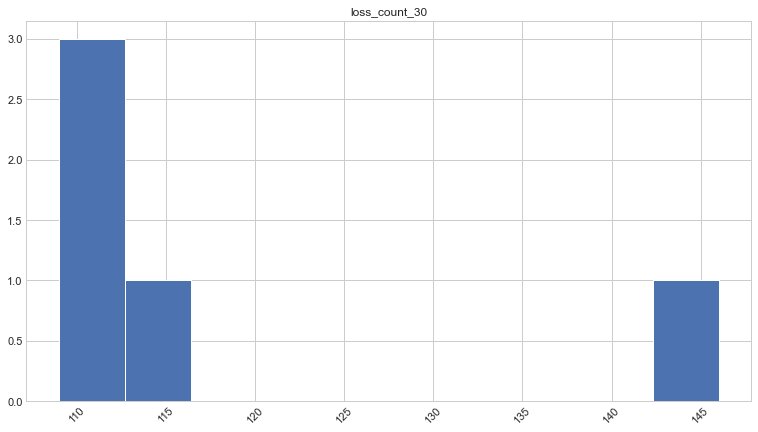

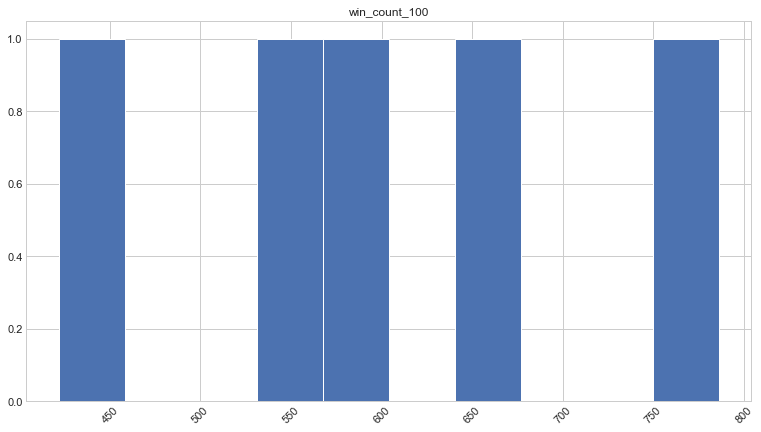

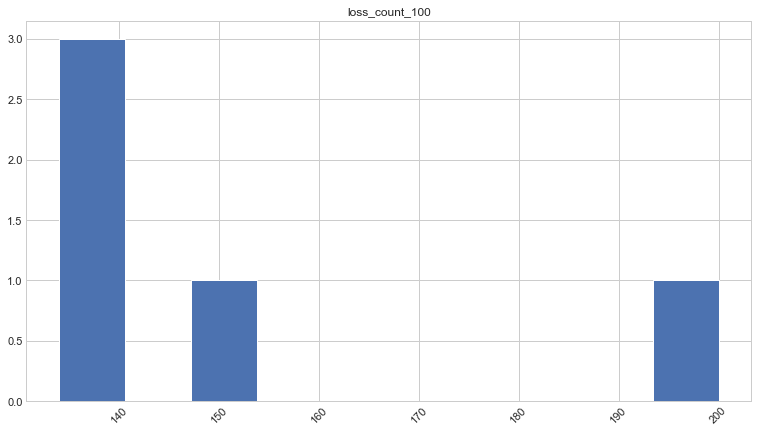

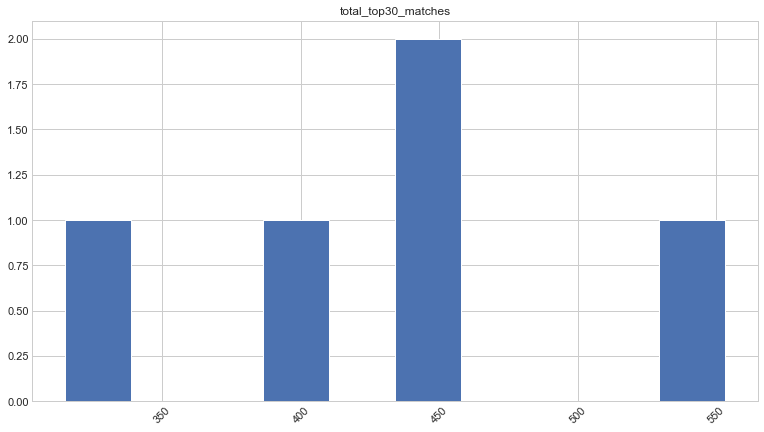

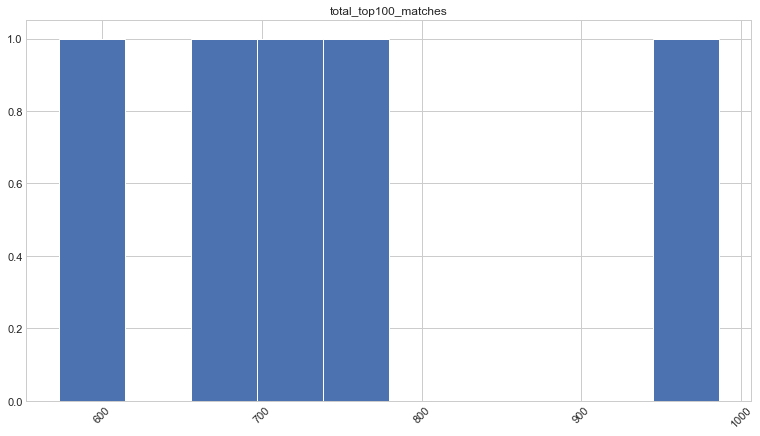

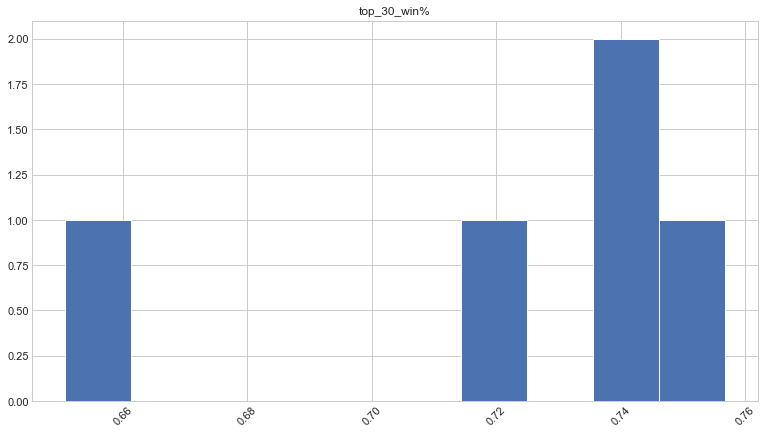

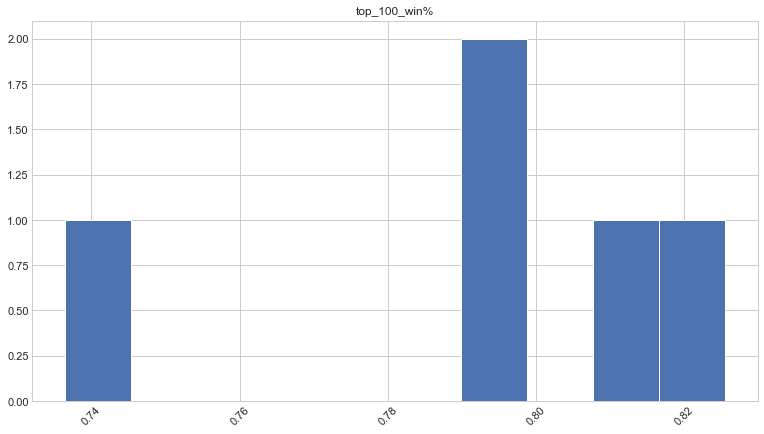

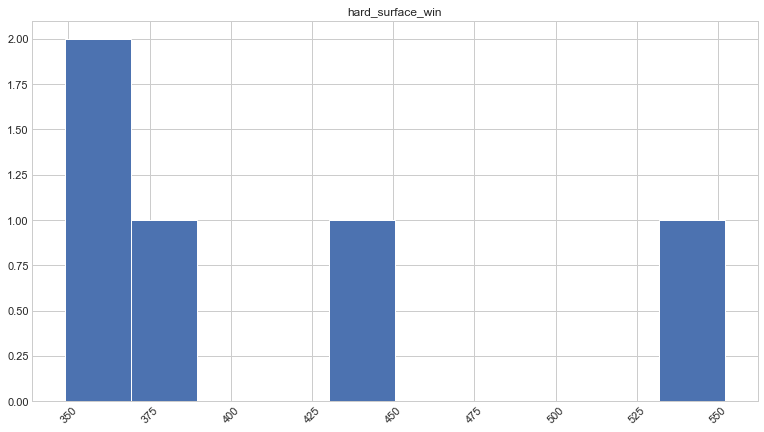

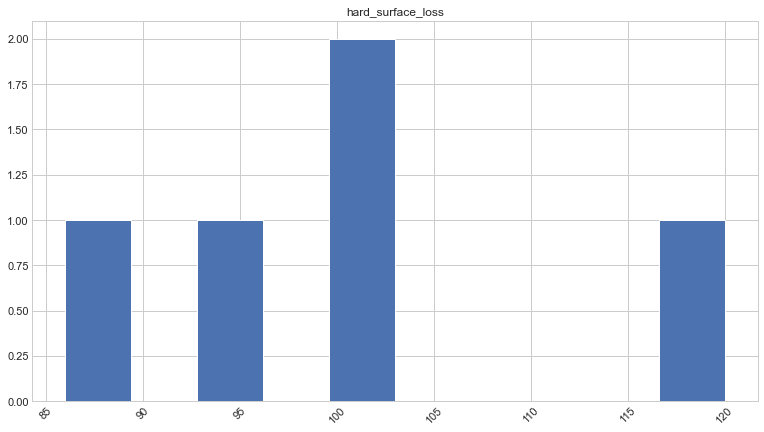

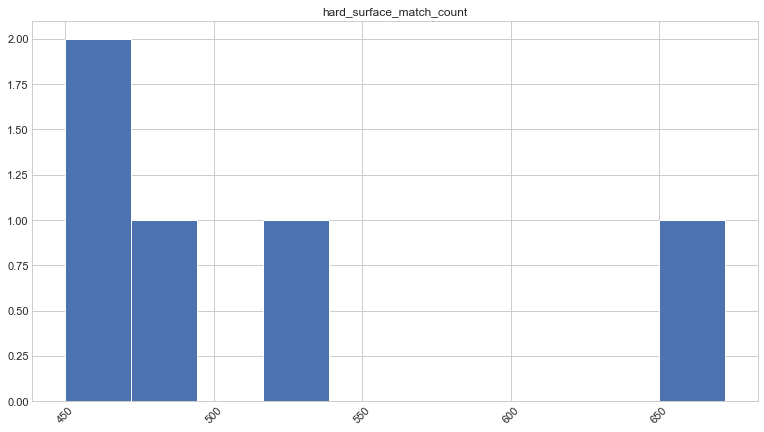

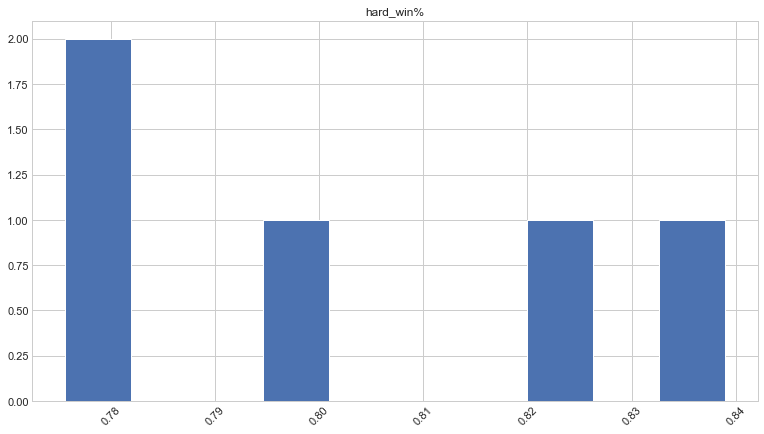

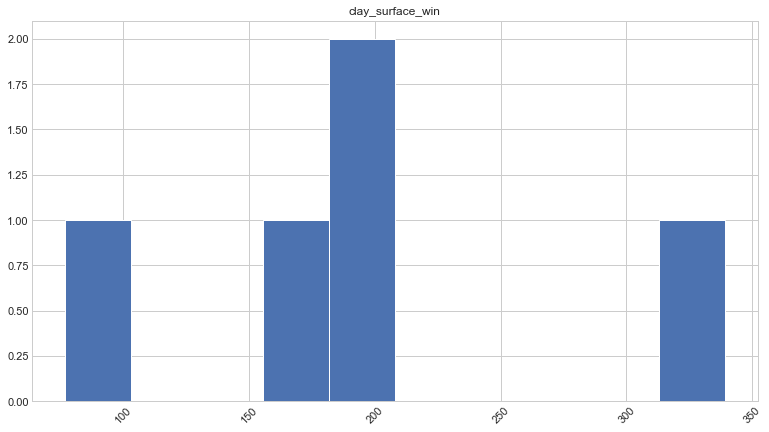

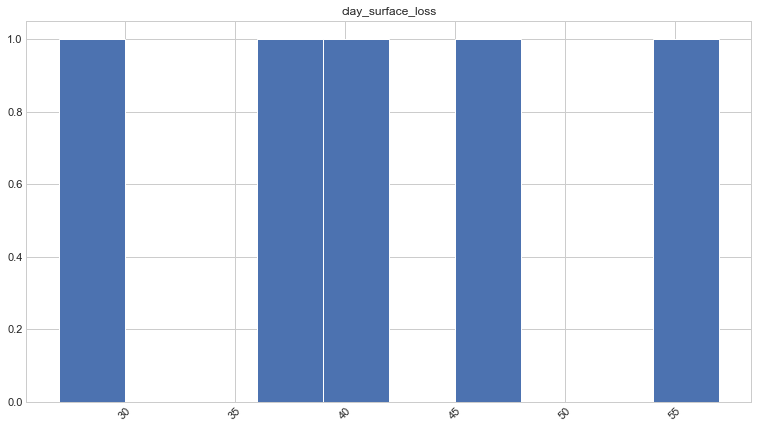

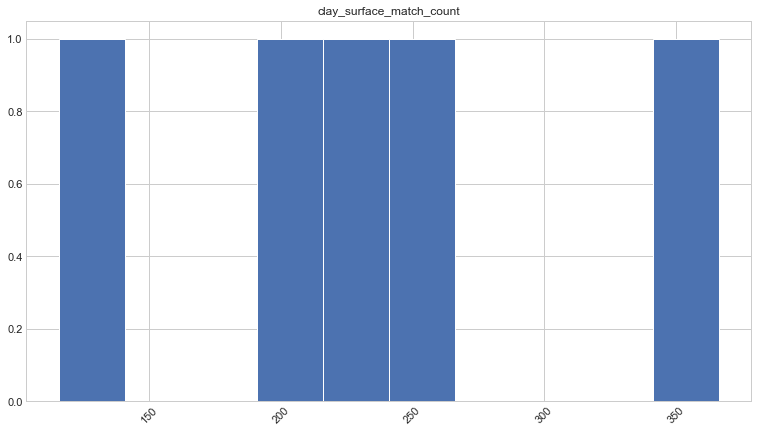

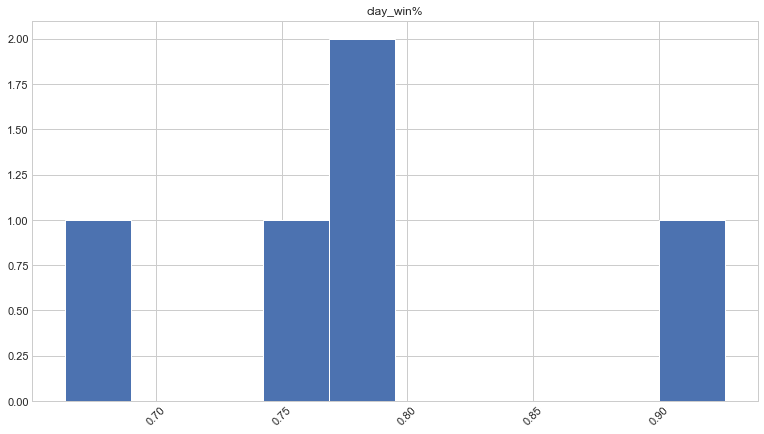

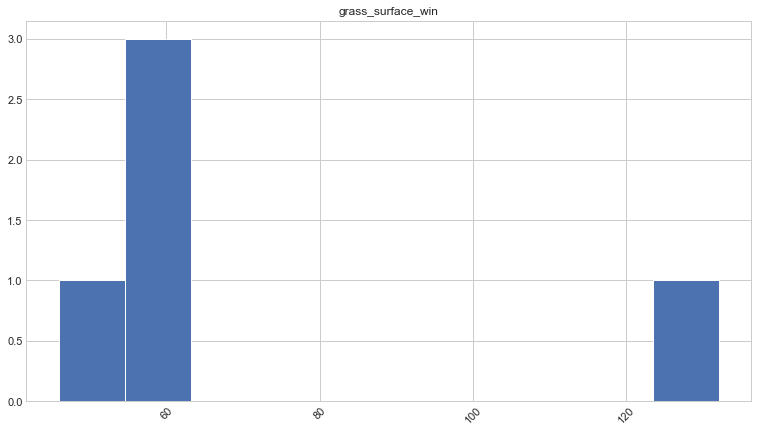

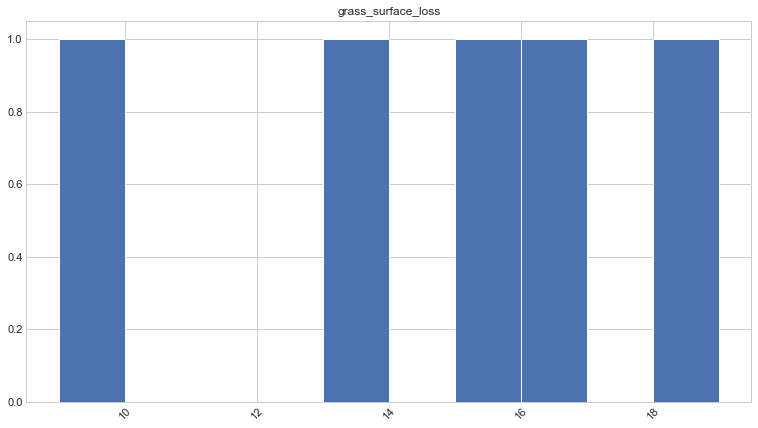

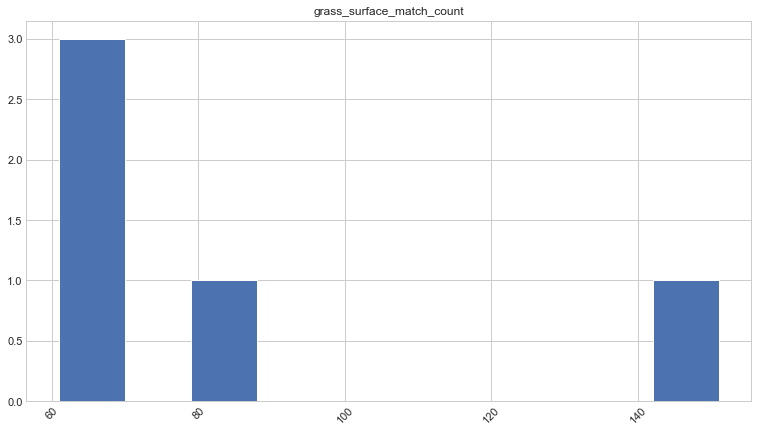

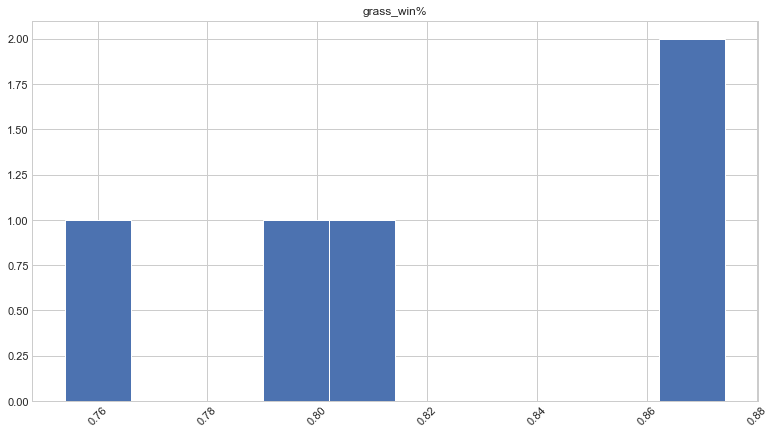

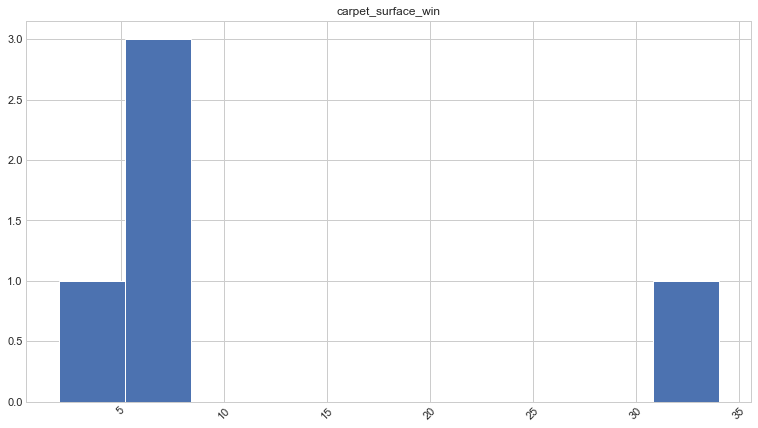

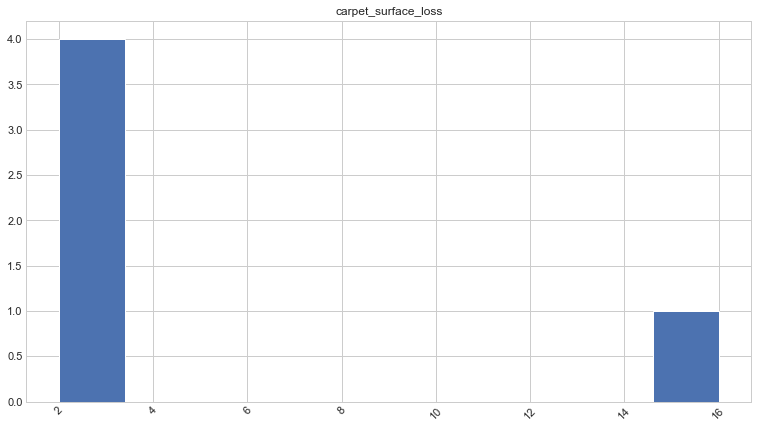

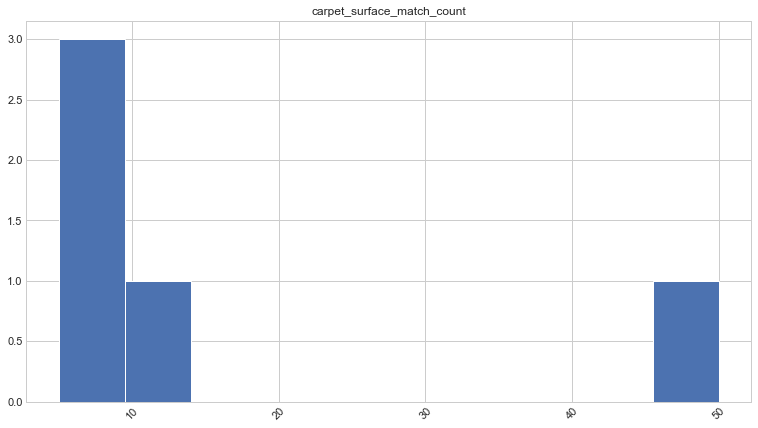

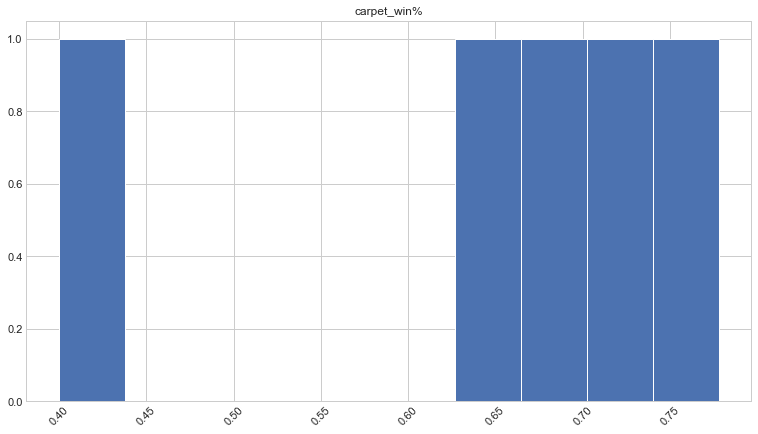

In [20]:
# visualize features for outliers
for col in roger_and_rivals:
    roger_and_rivals[col].hist()
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()

# Note: update this with the new columns

#Create a datafreame that shows the fifference between roger_federer all the top rivals
rivals_difference = roger_and_rivals[['playerid', 'age', 'height', 'maxrank', 'win_count', 'lose_count',
       'match_count', 'win%', 'aces_in_match_lost', 'aces_in_match_won',
       'ace_count', 'aces_per_game', 'first_serve_percentage_match_lost',
       'first_serve_percentage_match_won',
       'first_serve_won_percentage_match_lost',
       'first_serve_won_percentage_match_won', 'breakpoints_won_match_lost',
       'breakpoints_won_match_won', 'breakpoint_count', 'breakpoints_per_game',
       'win_count_30', 'loss_count_30', 'win_count_100', 'loss_count_100',
       'total_top30_matches', 'total_top100_matches', 'top_30_win%',
       'top_100_win%', 'hard_surface_win', 'hard_surface_loss',
       'hard_surface_match_count', 'hard_win%', 'clay_surface_win',
       'clay_surface_loss', 'clay_surface_match_count', 'clay_win%',
       'grass_surface_win', 'grass_surface_loss', 'grass_surface_match_count',
       'grass_win%', 'carpet_surface_win', 'carpet_surface_loss',
       'carpet_surface_match_count', 'carpet_win%']].diff()

In [21]:
roger_and_rivals

,playerid,player_name,age,height,maxrank,hand,country,win_count,lose_count,match_count,win%,aces_in_match_lost,aces_in_match_won,ace_count,aces_per_game,first_serve_percentage_match_lost,first_serve_percentage_match_won,first_serve_won_percentage_match_lost,first_serve_won_percentage_match_won,breakpoints_won_match_lost,breakpoints_won_match_won,breakpoint_count,breakpoints_per_game,win_count_30,loss_count_30,win_count_100,loss_count_100,total_top30_matches,total_top100_matches,top_30_win%,top_100_win%,hard_surface_win,hard_surface_loss,hard_surface_match_count,hard_win%,clay_surface_win,clay_surface_loss,clay_surface_match_count,clay_win%,grass_surface_win,grass_surface_loss,grass_surface_match_count,grass_win%,carpet_surface_win,carpet_surface_loss,carpet_surface_match_count,carpet_win%
0,103819,roger_federer,22.485969,185.000000,1,R,SUI,907.000000,212.0,1119.000000,0.810000,1541.000000,6829.000000,8370.0,7.480000,0.597457,0.629201,0.701538,0.796579,391.000000,3238.0,3629.000000,3.243074,407.0,146.000000,786.0,200.000000,553.000000,986.000000,0.735986,0.797160,552.000000,120.0,672.000000,0.821429,189.000000,57.0,246.000000,0.768293,132.000000,19.000000,151.0,0.874172,34.000000,16.000000,50.000000,0.680000
1,104745,rafael_nadal,22.228611,185.000000,1,L,ESP,741.000000,146.0,887.000000,0.840000,407.000000,2257.000000,2664.0,3.003000,0.680257,0.683340,0.637243,0.748767,265.000000,3207.0,3472.000000,3.914318,339.0,109.000000,643.0,136.000000,448.000000,779.000000,0.756696,0.825417,354.000000,101.0,455.000000,0.778022,339.000000,27.0,366.000000,0.926230,46.000000,15.000000,61.0,0.754098,2.000000,3.000000,5.000000,0.400000
2,104925,novak_djokovic,24.213552,188.000000,1,R,SRB,670.000000,143.0,813.000000,0.820000,605.000000,3621.000000,4226.0,5.198000,0.635394,0.656273,0.653117,0.762887,246.000000,2819.0,3065.000000,3.769988,326.0,115.000000,588.0,134.000000,441.000000,722.000000,0.739229,0.814404,448.000000,86.0,534.000000,0.838951,156.000000,45.0,201.000000,0.776119,58.000000,9.000000,67.0,0.865672,8.000000,3.000000,11.000000,0.727273
3,104918,andy_murray,29.503080,190.000000,1,R,GBR,496.000000,158.0,654.000000,0.760000,937.000000,3336.000000,4273.0,6.534000,0.559638,0.588219,0.668232,0.772850,331.000000,2167.0,2498.000000,3.819572,205.0,110.000000,422.0,151.000000,315.000000,573.000000,0.650794,0.736475,349.000000,101.0,450.000000,0.775556,77.000000,39.0,116.000000,0.663793,63.000000,16.000000,79.0,0.797468,7.000000,2.000000,9.000000,0.777778
4,104862,nan,25.315081,187.666667,1,nan,nan,635.666667,149.0,784.666667,0.806667,649.666667,3071.333333,3721.0,4.911667,0.625097,0.642611,0.652864,0.761501,280.666667,2731.0,3011.666667,3.834626,290.0,111.333333,551.0,140.333333,401.333333,691.333333,0.715573,0.792099,383.666667,96.0,479.666667,0.797510,190.666667,37.0,227.666667,0.788714,55.666667,13.333333,69.0,0.805746,5.666667,2.666667,8.333333,0.635017


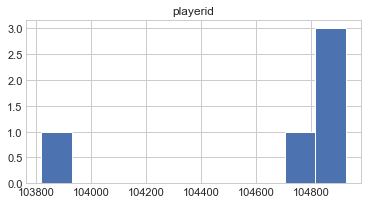

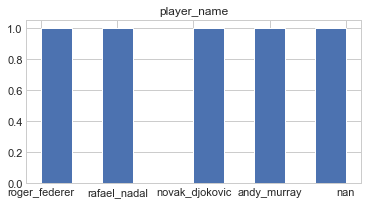

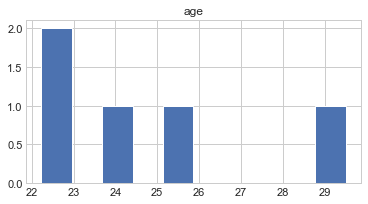

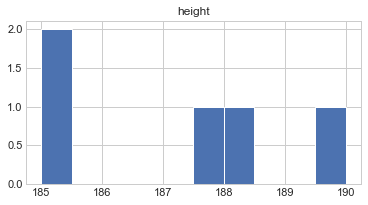

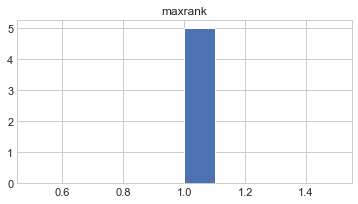

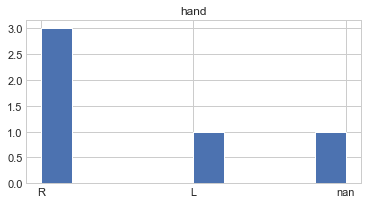

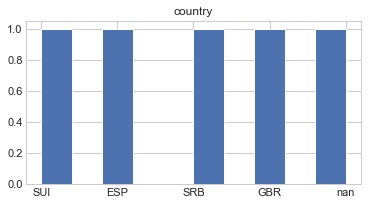

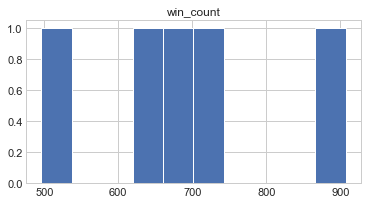

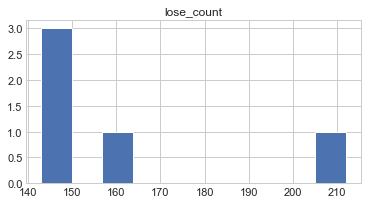

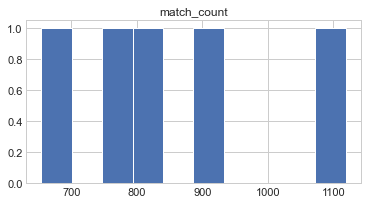

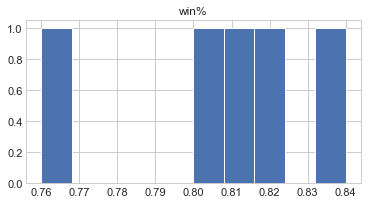

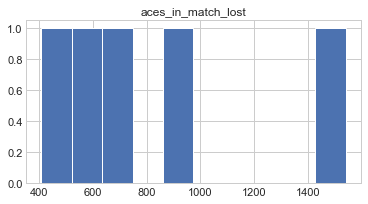

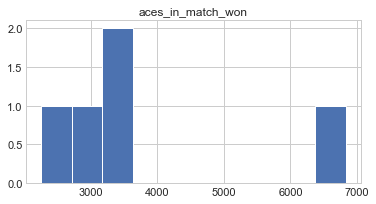

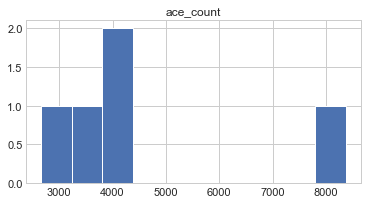

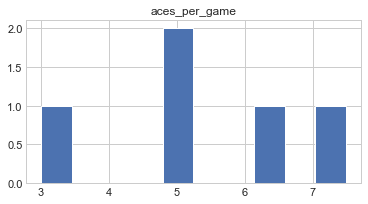

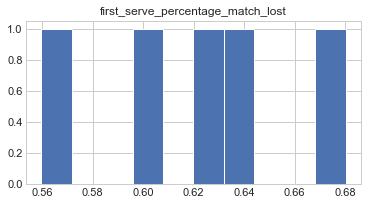

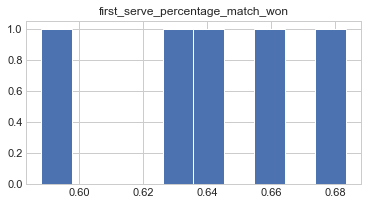

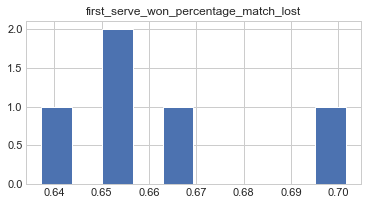

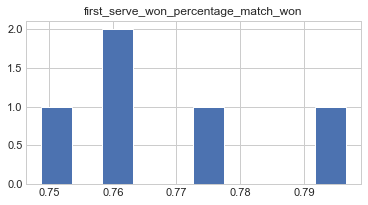

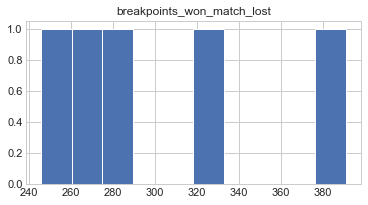

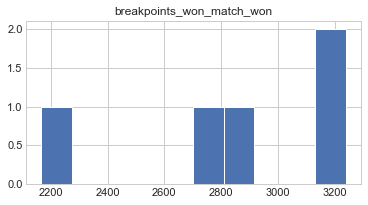

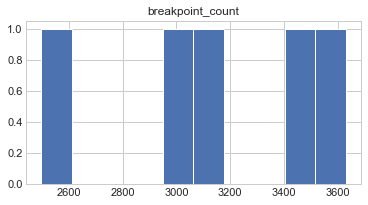

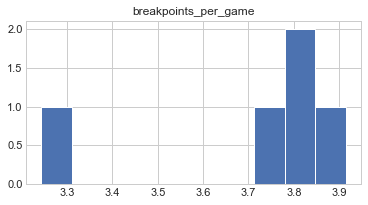

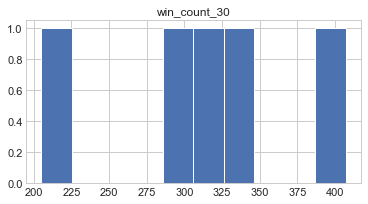

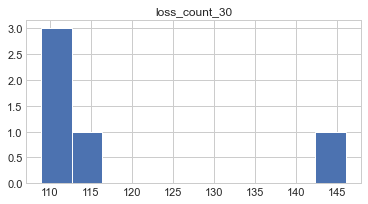

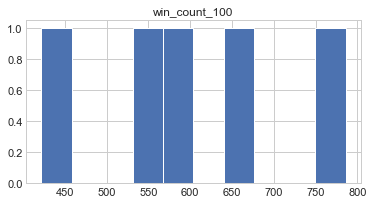

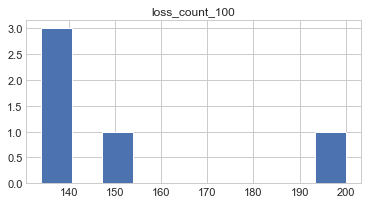

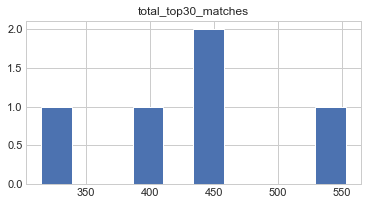

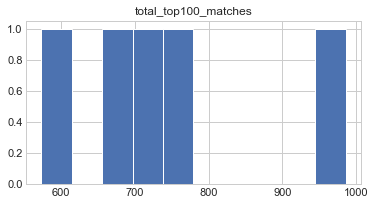

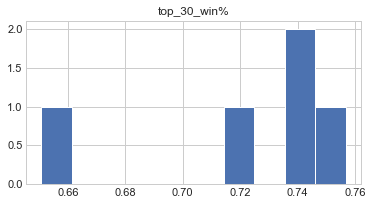

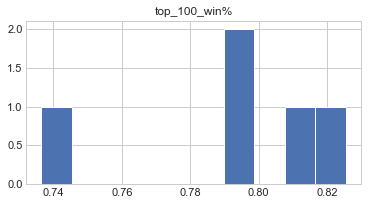

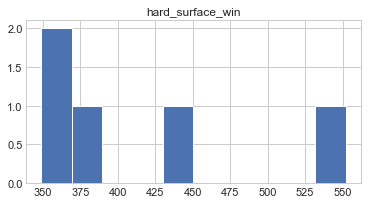

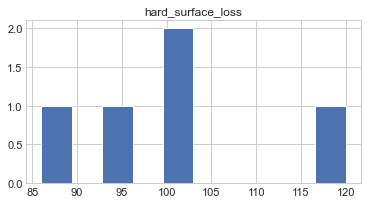

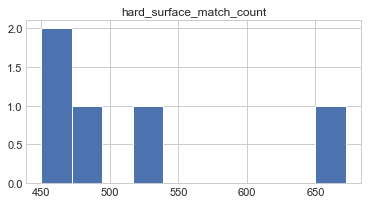

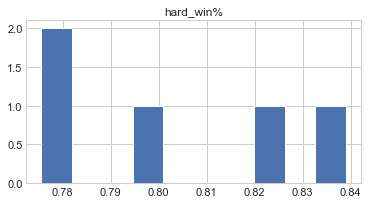

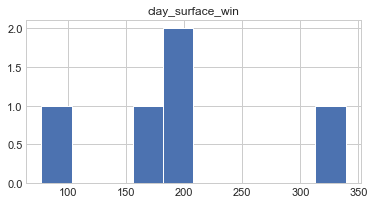

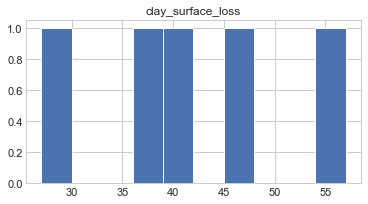

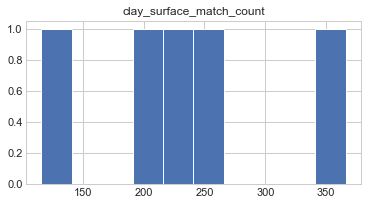

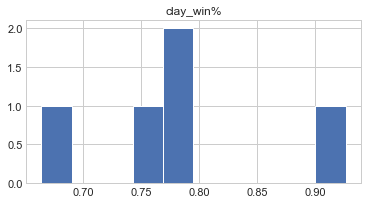

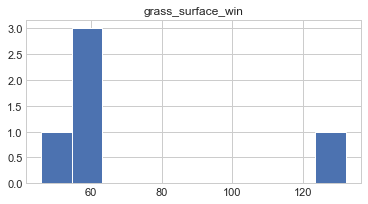

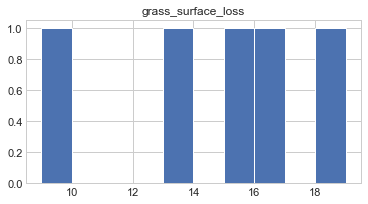

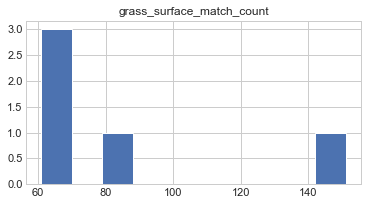

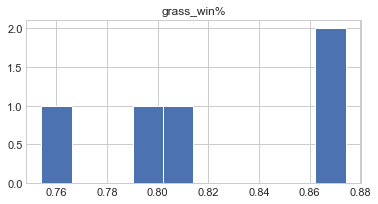

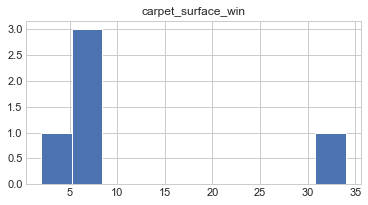

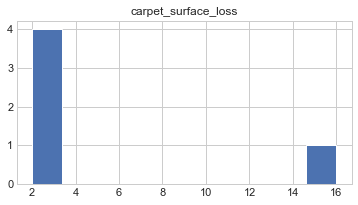

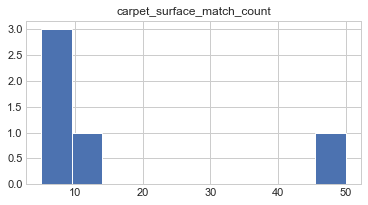

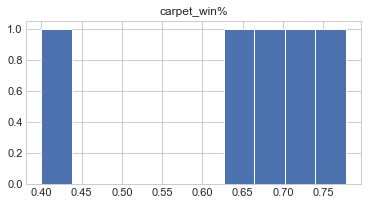

In [22]:
for col in roger_and_rivals.columns:
    plt.figure(figsize=(6,3))
    plt.hist(roger_and_rivals[col])
    plt.title(col)
    plt.show()

 
---

## Explore the matches for Roger Federer against his top rivals 

In [23]:
# Look at the .csv with all the games data using the prepare module
match = prepare.prepare_atp()
# df.drop(columns = 'Unnamed: 0', inplace=True)
match.sample(5)

,tourney_id,tourney_name,surface,draw_size,tourney_level,match_num,score,best_of,round,minutes,player_1,player_2,player_1_age,player_2_age,player_1_hand,player_2_hand,player_1_ht,player_2_ht,player_1_id,player_2_id,player_1_ioc,player_2_ioc,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,player_1_aces,player_2_aces,player_1_double_faults,player_2_double_faults,player_1_service_points,player_2_service_points,player_1_first_serves_in,player_2_first_serves_in,player_1_first_serve_points_won,player_2_first_serve_points_won,player_1_second_serve_points_won,player_2_second_serve_points_won,player_1_service_game_total,player_2_service_game_total,player_1_break_points_saved,player_2_break_points_saved,player_1_break_points_faced,player_2_break_points_faced,winner,player_1_first_serve_%,player_2_first_serve_%,player_1_first_serve_win_%,player_2_first_serve_win_%,player_1_break_points_won,player_2_break_points_won,player_1_wins,player_1_seeded,player_2_seeded,surface_Carpet,surface_Clay,surface_Grass,surface_Hard,tourney_level_A,tourney_level_D,tourney_level_F,tourney_level_G,tourney_level_M,player_1_hand_L,player_1_hand_R,player_2_hand_L,player_2_hand_R,round_ER,round_F,round_QF,round_R128,round_R16,round_R32,round_R64,round_RR,round_SF
tourney_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-01-13,2014-580,Australian Open,Hard,128,G,98,7-5 6-1 6-0,5,R32,107.0,Donald Young,Kei Nishikori,24.476386,24.041068,L,R,183.0,178.0,105385,105453,USA,JPN,91.0,17.0,595.0,1915.0,Unseeded,16.0,1.0,3.0,5.0,1.0,73.0,76.0,47.0,41.0,23.0,29.0,7.0,21.0,13.0,12.0,4.0,3.0,12.0,4.0,Kei Nishikori,0.643836,0.539474,0.489362,0.707317,1.0,8.0,False,False,True,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0
2005-04-25,2005-468,Estoril,Clay,32,A,11,6-3 6-3,3,R32,62.0,Guillermo Garcia Lopez,Ivo Karlovic,21.891855,26.154689,R,R,188.0,208.0,104198,103333,ESP,CRO,80.0,64.0,480.0,585.0,Unseeded,Unseeded,0.0,6.0,0.0,7.0,39.0,64.0,25.0,33.0,24.0,26.0,12.0,11.0,9.0,9.0,0.0,3.0,0.0,6.0,Guillermo Garcia Lopez,0.641026,0.515625,0.960000,0.787879,3.0,0.0,True,False,False,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0
2016-10-17,2016-M014,Moscow,Hard,32,A,277,6-3 5-7 6-2,3,R32,128.0,Andrey Kuznetsov,Guido Pella,25.650924,26.420260,R,L,185.0,185.0,105723,105550,RUS,ARG,45.0,56.0,995.0,816.0,8.0,Unseeded,5.0,7.0,3.0,0.0,94.0,102.0,52.0,53.0,37.0,35.0,21.0,22.0,14.0,15.0,6.0,6.0,9.0,12.0,Andrey Kuznetsov,0.553191,0.519608,0.711538,0.660377,6.0,3.0,True,True,False,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0
2005-11-14,2005-605,Masters Cup,Carpet,8,F,6,7-5 6-4,3,RR,107.0,David Nalbandian,Guillermo Coria,23.868583,23.835729,R,R,180.0,175.0,103900,103909,ARG,ARG,12.0,6.0,1720.0,2190.0,Unseeded,Unseeded,1.0,1.0,2.0,14.0,77.0,69.0,47.0,39.0,27.0,21.0,13.0,8.0,11.0,11.0,9.0,8.0,14.0,15.0,David Nalbandian,0.610390,0.565217,0.574468,0.538462,7.0,5.0,True,False,False,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
2000-07-10,2000-315,Newport,Grass,32,A,1,6-1 6-2,3,R32,50.0,Chris Woodruff,Michael Russell,27.518138,22.193018,R,R,188.0,173.0,102162,103188,USA,USA,64.0,185.0,649.0,199.0,1.0,Unseeded,2.0,0.0,4.0,7.0,41.0,47.0,25.0,21.0,20.0,12.0,12.0,10.0,8.0,7.0,0.0,1.0,0.0,5.0,Chris Woodruff,0.609756,0.446809,0.800000,0.571429,4.0,0.0,True,True,False,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0


In [24]:
match.sample()


,tourney_id,tourney_name,surface,draw_size,tourney_level,match_num,score,best_of,round,minutes,player_1,player_2,player_1_age,player_2_age,player_1_hand,player_2_hand,player_1_ht,player_2_ht,player_1_id,player_2_id,player_1_ioc,player_2_ioc,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,player_1_aces,player_2_aces,player_1_double_faults,player_2_double_faults,player_1_service_points,player_2_service_points,player_1_first_serves_in,player_2_first_serves_in,player_1_first_serve_points_won,player_2_first_serve_points_won,player_1_second_serve_points_won,player_2_second_serve_points_won,player_1_service_game_total,player_2_service_game_total,player_1_break_points_saved,player_2_break_points_saved,player_1_break_points_faced,player_2_break_points_faced,winner,player_1_first_serve_%,player_2_first_serve_%,player_1_first_serve_win_%,player_2_first_serve_win_%,player_1_break_points_won,player_2_break_points_won,player_1_wins,player_1_seeded,player_2_seeded,surface_Carpet,surface_Clay,surface_Grass,surface_Hard,tourney_level_A,tourney_level_D,tourney_level_F,tourney_level_G,tourney_level_M,player_1_hand_L,player_1_hand_R,player_2_hand_L,player_2_hand_R,round_ER,round_F,round_QF,round_R128,round_R16,round_R32,round_R64,round_RR,round_SF
tourney_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-10-27,2014-352,Paris Masters,Hard,48,M,20,6-3 6-4,3,R32,72.0,Andy Murray,Julien Benneteau,27.45243,32.851472,R,R,190.0,185.0,104918,103898,GBR,FRA,8.0,28.0,4295.0,1330.0,8.0,Unseeded,5.0,2.0,0.0,3.0,52.0,49.0,25.0,36.0,21.0,25.0,18.0,4.0,10.0,9.0,3.0,0.0,4.0,3.0,Andy Murray,0.480769,0.734694,0.84,0.694444,3.0,1.0,True,True,False,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0


In [25]:
df.head()

,playerid,player_name,age,height,maxrank,hand,country,win_count,lose_count,match_count,win%,aces_in_match_lost,aces_in_match_won,ace_count,aces_per_game,first_serve_percentage_match_lost,first_serve_percentage_match_won,first_serve_won_percentage_match_lost,first_serve_won_percentage_match_won,breakpoints_won_match_lost,breakpoints_won_match_won,breakpoint_count,breakpoints_per_game,win_count_30,loss_count_30,win_count_100,loss_count_100,total_top30_matches,total_top100_matches,top_30_win%,top_100_win%,hard_surface_win,hard_surface_loss,hard_surface_match_count,hard_win%,clay_surface_win,clay_surface_loss,clay_surface_match_count,clay_win%,grass_surface_win,grass_surface_loss,grass_surface_match_count,grass_win%,carpet_surface_win,carpet_surface_loss,carpet_surface_match_count,carpet_win%
0,103720,lleyton_hewitt,20.752909,180.0,1.0,R,AUS,458.0,196.0,654.0,0.70,1034.0,2823.0,3857.0,5.898,0.525558,0.539098,0.675974,0.773470,407.0,1947.0,2354.0,3.599388,134.0,110.0,351.0,184.0,244.0,535.0,0.549180,0.656075,265.0,118.0,383.0,0.691906,85.0,46.0,131.0,0.648855,93.0,27.0,120.0,0.775000,15.0,5.0,20.0,0.750000
1,102158,patrick_rafter,26.477755,185.0,2.0,R,AUS,97.0,44.0,141.0,0.69,292.0,637.0,929.0,6.589,0.637279,0.653328,0.700358,0.795185,61.0,342.0,403.0,2.858156,35.0,25.0,75.0,38.0,60.0,113.0,0.583333,0.663717,47.0,25.0,72.0,0.652778,14.0,11.0,25.0,0.560000,31.0,6.0,37.0,0.837838,5.0,2.0,7.0,0.714286
2,103017,nicolas_kiefer,22.535250,183.0,4.0,R,GER,217.0,162.0,379.0,0.57,975.0,1514.0,2489.0,6.567,0.514047,0.537990,0.689337,0.792370,240.0,836.0,1076.0,2.839050,70.0,87.0,168.0,148.0,157.0,316.0,0.445860,0.531646,141.0,88.0,229.0,0.615721,37.0,44.0,81.0,0.456790,19.0,14.0,33.0,0.575758,20.0,16.0,36.0,0.555556
3,210013,martin_damm_sr,28.227242,188.0,67.0,R,CZE,19.0,32.0,51.0,0.37,203.0,141.0,344.0,6.745,0.546553,0.611743,0.693080,0.806999,38.0,72.0,110.0,2.156863,4.0,9.0,11.0,25.0,13.0,36.0,0.307692,0.305556,9.0,16.0,25.0,0.360000,4.0,7.0,11.0,0.363636,6.0,7.0,13.0,0.461538,0.0,0.0,0.0,0.000000
4,103264,mariano_puerta,26.904860,180.0,9.0,L,ARG,76.0,79.0,155.0,0.49,272.0,273.0,545.0,3.516,0.637432,0.680268,0.613399,0.746508,93.0,272.0,365.0,2.354839,11.0,33.0,55.0,71.0,44.0,126.0,0.250000,0.436508,14.0,21.0,35.0,0.400000,61.0,48.0,109.0,0.559633,0.0,0.0,0.0,0.000000,1.0,7.0,8.0,0.125000


In [26]:
# we have no data for andy_roddick
df[df['player_name'] == 'andy_roddick']

,playerid,player_name,age,height,maxrank,hand,country,win_count,lose_count,match_count,win%,aces_in_match_lost,aces_in_match_won,ace_count,aces_per_game,first_serve_percentage_match_lost,first_serve_percentage_match_won,first_serve_won_percentage_match_lost,first_serve_won_percentage_match_won,breakpoints_won_match_lost,breakpoints_won_match_won,breakpoint_count,breakpoints_per_game,win_count_30,loss_count_30,win_count_100,loss_count_100,total_top30_matches,total_top100_matches,top_30_win%,top_100_win%,hard_surface_win,hard_surface_loss,hard_surface_match_count,hard_win%,clay_surface_win,clay_surface_loss,clay_surface_match_count,clay_win%,grass_surface_win,grass_surface_loss,grass_surface_match_count,grass_win%,carpet_surface_win,carpet_surface_loss,carpet_surface_match_count,carpet_win%
471,104053,andy_roddick,21.196441,188.0,1.0,R,USA,430.0,151.0,581.0,0.74,1473.0,4830.0,6303.0,10.849,0.624105,0.654332,0.728889,0.820516,151.0,1250.0,1401.0,2.41136,111.0,83.0,344.0,142.0,194.0,486.0,0.572165,0.707819,303.0,100.0,403.0,0.751861,58.0,31.0,89.0,0.651685,54.0,14.0,68.0,0.794118,15.0,6.0,21.0,0.714286


In [27]:
match.sample()

,tourney_id,tourney_name,surface,draw_size,tourney_level,match_num,score,best_of,round,minutes,player_1,player_2,player_1_age,player_2_age,player_1_hand,player_2_hand,player_1_ht,player_2_ht,player_1_id,player_2_id,player_1_ioc,player_2_ioc,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,player_1_aces,player_2_aces,player_1_double_faults,player_2_double_faults,player_1_service_points,player_2_service_points,player_1_first_serves_in,player_2_first_serves_in,player_1_first_serve_points_won,player_2_first_serve_points_won,player_1_second_serve_points_won,player_2_second_serve_points_won,player_1_service_game_total,player_2_service_game_total,player_1_break_points_saved,player_2_break_points_saved,player_1_break_points_faced,player_2_break_points_faced,winner,player_1_first_serve_%,player_2_first_serve_%,player_1_first_serve_win_%,player_2_first_serve_win_%,player_1_break_points_won,player_2_break_points_won,player_1_wins,player_1_seeded,player_2_seeded,surface_Carpet,surface_Clay,surface_Grass,surface_Hard,tourney_level_A,tourney_level_D,tourney_level_F,tourney_level_G,tourney_level_M,player_1_hand_L,player_1_hand_R,player_2_hand_L,player_2_hand_R,round_ER,round_F,round_QF,round_R128,round_R16,round_R32,round_R64,round_RR,round_SF
tourney_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2002-09-09,2002-73,Tashkent,Hard,32,A,23,6-1 6-3,3,R16,67.0,Mikhail Youzhny,Vladimir Voltchkov,20.208077,24.424367,R,R,183.0,180.0,104022,103166,RUS,BLR,46.0,153.0,763.0,251.0,7.0,Unseeded,1.0,3.0,1.0,0.0,54.0,42.0,43.0,31.0,25.0,25.0,2.0,8.0,8.0,8.0,4.0,1.0,8.0,1.0,Vladimir Voltchkov,0.796296,0.738095,0.581395,0.806452,0.0,4.0,False,True,False,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0


In [28]:
# we have no data for andy_roddick
match[match['player_1'] == 'Andy Roddick']

,tourney_id,tourney_name,surface,draw_size,tourney_level,match_num,score,best_of,round,minutes,player_1,player_2,player_1_age,player_2_age,player_1_hand,player_2_hand,player_1_ht,player_2_ht,player_1_id,player_2_id,player_1_ioc,player_2_ioc,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,player_1_aces,player_2_aces,player_1_double_faults,player_2_double_faults,player_1_service_points,player_2_service_points,player_1_first_serves_in,player_2_first_serves_in,player_1_first_serve_points_won,player_2_first_serve_points_won,player_1_second_serve_points_won,player_2_second_serve_points_won,player_1_service_game_total,player_2_service_game_total,player_1_break_points_saved,player_2_break_points_saved,player_1_break_points_faced,player_2_break_points_faced,winner,player_1_first_serve_%,player_2_first_serve_%,player_1_first_serve_win_%,player_2_first_serve_win_%,player_1_break_points_won,player_2_break_points_won,player_1_wins,player_1_seeded,player_2_seeded,surface_Carpet,surface_Clay,surface_Grass,surface_Hard,tourney_level_A,tourney_level_D,tourney_level_F,tourney_level_G,tourney_level_M,player_1_hand_L,player_1_hand_R,player_2_hand_L,player_2_hand_R,round_ER,round_F,round_QF,round_R128,round_R16,round_R32,round_R64,round_RR,round_SF
tourney_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-08-07,2000-422,Cincinnati Masters,Hard,64,M,23,7-6(5) 6-1,3,R64,73.0,Andy Roddick,Gianluca Pozzi,17.938398,35.140315,R,L,188.0,180.0,104053,101150,USA,ITA,643.0,49.0,20.0,769.0,Unseeded,Unseeded,15.0,9.0,4.0,0.0,60.0,56.0,36.0,31.0,29.0,25.0,8.0,20.0,9.0,10.0,4.0,0.0,6.0,0.0,Gianluca Pozzi,0.600000,0.553571,0.805556,0.806452,0.0,2.0,False,False,False,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0
2001-02-19,2001-402,Memphis,Hard,48,A,28,6-7(5) 6-0 6-4,3,R32,115.0,Andy Roddick,Tommy Haas,18.475017,22.882957,R,R,188.0,188.0,104053,103163,USA,GER,124.0,21.0,310.0,1210.0,Unseeded,3.0,15.0,15.0,4.0,4.0,111.0,86.0,72.0,51.0,44.0,39.0,19.0,24.0,14.0,14.0,8.0,0.0,12.0,0.0,Tommy Haas,0.648649,0.593023,0.611111,0.764706,0.0,4.0,False,False,True,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0
2001-02-19,2001-402,Memphis,Hard,48,A,12,6-4 7-5,3,R64,60.0,Andy Roddick,Antony Dupuis,18.475017,27.986311,R,R,188.0,185.0,104053,102179,USA,FRA,124.0,89.0,310.0,440.0,Unseeded,Unseeded,11.0,7.0,1.0,2.0,59.0,61.0,45.0,41.0,40.0,35.0,6.0,8.0,11.0,11.0,2.0,6.0,2.0,8.0,Andy Roddick,0.762712,0.672131,0.888889,0.853659,2.0,0.0,True,False,False,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
2001-02-26,2001-424,San Jose,Hard,32,A,7,6-4 6-4,3,R32,66.0,Andy Roddick,Chris Woodruff,18.494182,28.150582,R,R,188.0,188.0,104053,102162,USA,USA,123.0,89.0,325.0,450.0,Unseeded,Unseeded,8.0,5.0,1.0,2.0,53.0,61.0,25.0,36.0,19.0,27.0,19.0,11.0,10.0,10.0,0.0,5.0,1.0,8.0,Andy Roddick,0.471698,0.590164,0.760000,0.750000,3.0,1.0,True,False,False,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0
2001-02-26,2001-424,San Jose,Hard,32,A,20,7-6(5) 7-6(1),3,R16,92.0,Andy Roddick,Jan Michael Gambill,18.494182,23.734428,R,R,188.0,190.0,104053,102998,USA,USA,123.0,26.0,325.0,1115.0,Unseeded,6.0,9.0,11.0,1.0,8.0,66.0,75.0,43.0,36.0,35.0,33.0,17.0,25.0,12.0,12.0,0.0,2.0,0.0,2.0,Jan Michael Gambill,0.651515,0.480000,0.813953,0.916667,0.0,0.0,False,False,True,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-08-19,2012-6242,Winston-Salem,Hard,48,A,39,7-6(6) 7-6(3),3,R16,111.0,Andy Roddick,Steve Darcis,29.973990,28.438056,R,R,188.0,178.0,104053,104327,USA,BEL,21.0,81.0,1645.0,630.0,5.0,Unseeded,8.0,5.0,0.0,3.0,75.0,82.0,53.0,50.0,41.0,39.0,14.0,21.0,12.0,12.0,3.0,1.0,3.0,1.0,Steve Darcis,0.706667,0.609756,0.773585,0.780000,0.0,

In [29]:
# lets create a dataframe that allows us to analyse Roger Federer and his games 
roger1 = match[match['player_1'] == 'Roger Federer']
roger2 = match[match['player_2'] == 'Roger Federer']
roger = pd.concat([roger1, roger2])

In [30]:
# Check the shapes
roger1.shape
roger2.shape


(869, 78)

In [31]:
# 
# roger.to_csv('roger_games.csv')

In [32]:
roger.sample(3)

,tourney_id,tourney_name,surface,draw_size,tourney_level,match_num,score,best_of,round,minutes,player_1,player_2,player_1_age,player_2_age,player_1_hand,player_2_hand,player_1_ht,player_2_ht,player_1_id,player_2_id,player_1_ioc,player_2_ioc,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,player_1_aces,player_2_aces,player_1_double_faults,player_2_double_faults,player_1_service_points,player_2_service_points,player_1_first_serves_in,player_2_first_serves_in,player_1_first_serve_points_won,player_2_first_serve_points_won,player_1_second_serve_points_won,player_2_second_serve_points_won,player_1_service_game_total,player_2_service_game_total,player_1_break_points_saved,player_2_break_points_saved,player_1_break_points_faced,player_2_break_points_faced,winner,player_1_first_serve_%,player_2_first_serve_%,player_1_first_serve_win_%,player_2_first_serve_win_%,player_1_break_points_won,player_2_break_points_won,player_1_wins,player_1_seeded,player_2_seeded,surface_Carpet,surface_Clay,surface_Grass,surface_Hard,tourney_level_A,tourney_level_D,tourney_level_F,tourney_level_G,tourney_level_M,player_1_hand_L,player_1_hand_R,player_2_hand_L,player_2_hand_R,round_ER,round_F,round_QF,round_R128,round_R16,round_R32,round_R64,round_RR,round_SF
tourney_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-05-03,2015-1536,Madrid Masters,Clay,56,M,25,6-7(2) 7-6(5) 7-6(12),3,R32,157.0,Nick Kyrgios,Roger Federer,20.019165,33.735797,R,R,193.0,185.0,106401,103819,AUS,SUI,35.0,2.0,1130.0,8635.0,Unseeded,1.0,22.0,16.0,2.0,1.0,129.0,129.0,85.0,74.0,67.0,58.0,19.0,30.0,18.0,18.0,2.0,1.0,4.0,3.0,Nick Kyrgios,0.658915,0.573643,0.788235,0.783784,2.0,2.0,True,False,True,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0
2010-10-18,2010-429,Stockholm,Hard,28,A,27,6-4 6-3,3,F,64.0,Florian Mayer,Roger Federer,27.036277,29.193703,R,R,190.0,185.0,104252,103819,GER,SUI,47.0,2.0,986.0,7335.0,Unseeded,1.0,6.0,4.0,0.0,0.0,57.0,54.0,44.0,33.0,26.0,28.0,7.0,11.0,9.0,10.0,4.0,1.0,7.0,2.0,Roger Federer,0.771930,0.611111,0.590909,0.848485,1.0,3.0,False,False,True,0,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0
2002-01-28,2002-408,Milan,Carpet,32,A,24,6-3 6-7(4) 7-5,3,R16,123.0,Nikolay Davydenko,Roger Federer,20.657084,20.473648,R,R,178.0,185.0,103786,103819,RUS,SUI,84.0,13.0,465.0,1920.0,Unseeded,2.0,9.0,8.0,2.0,1.0,112.0,97.0,67.0,71.0,53.0,56.0,17.0,18.0,16.0,17.0,4.0,1.0,6.0,1.0,Roger Federer,0.598214,0.731959,0.791045,0.788732,0.0,2.0,False,False,True,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0


In [33]:
# players to analise 
rivals = ['roger_federer', 'rafael_nadal', 'novak_djokovic', 'andy_murray'] # Andy Roddick is not in the df   

In [34]:
# creates a data frame with all the matches of Roger aganis his top three rivals
r_vs_a1 = roger[roger['player_1'] == 'Andy Murray']
r_vs_a2 = roger[roger['player_2'] == 'Andy Murray']
r_vs_ar1 = roger[roger['player_1'] == 'Andy Roddick']
r_vs_ar2 = roger[roger['player_2'] == 'Andy Roddick']
r_vs_d1 = roger[roger['player_1'] == 'Novak Djokovic']
r_vs_d2 = roger[roger['player_2'] == 'Novak Djokovic']
r_vs_n1 = roger[roger['player_1'] == 'Rafael Nadal']
r_vs_n2 = roger[roger['player_2'] == 'Rafael Nadal']


r_vs_ndmr  = pd.concat([r_vs_a1, r_vs_a1, r_vs_ar1, r_vs_d1, r_vs_d2, r_vs_n1, r_vs_n2, r_vs_ar2])
r_vs_ndmr.head(1)

,tourney_id,tourney_name,surface,draw_size,tourney_level,match_num,score,best_of,round,minutes,player_1,player_2,player_1_age,player_2_age,player_1_hand,player_2_hand,player_1_ht,player_2_ht,player_1_id,player_2_id,player_1_ioc,player_2_ioc,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,player_1_aces,player_2_aces,player_1_double_faults,player_2_double_faults,player_1_service_points,player_2_service_points,player_1_first_serves_in,player_2_first_serves_in,player_1_first_serve_points_won,player_2_first_serve_points_won,player_1_second_serve_points_won,player_2_second_serve_points_won,player_1_service_game_total,player_2_service_game_total,player_1_break_points_saved,player_2_break_points_saved,player_1_break_points_faced,player_2_break_points_faced,winner,player_1_first_serve_%,player_2_first_serve_%,player_1_first_serve_win_%,player_2_first_serve_win_%,player_1_break_points_won,player_2_break_points_won,player_1_wins,player_1_seeded,player_2_seeded,surface_Carpet,surface_Clay,surface_Grass,surface_Hard,tourney_level_A,tourney_level_D,tourney_level_F,tourney_level_G,tourney_level_M,player_1_hand_L,player_1_hand_R,player_2_hand_L,player_2_hand_R,round_ER,round_F,round_QF,round_R128,round_R16,round_R32,round_R64,round_RR,round_SF
tourney_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2006-08-14,2006-422,Cincinnati Masters,Hard,64,M,33,7-5 6-4,3,R32,97.0,Andy Murray,Roger Federer,19.249829,25.015743,R,R,190.0,185.0,104918,103819,GBR,SUI,21.0,1.0,1210.0,7760.0,Unseeded,1.0,4.0,6.0,3.0,3.0,68.0,76.0,28.0,42.0,17.0,24.0,19.0,13.0,11.0,11.0,2.0,7.0,7.0,14.0,Andy Murray,0.411765,0.552632,0.607143,0.571429,7.0,5.0,True,False,True,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0


In [35]:
r_vs_ndmr[r_vs_ndmr['player_1'] == 'Novak Djokovic']

,tourney_id,tourney_name,surface,draw_size,tourney_level,match_num,score,best_of,round,minutes,player_1,player_2,player_1_age,player_2_age,player_1_hand,player_2_hand,player_1_ht,player_2_ht,player_1_id,player_2_id,player_1_ioc,player_2_ioc,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,player_1_aces,player_2_aces,player_1_double_faults,player_2_double_faults,player_1_service_points,player_2_service_points,player_1_first_serves_in,player_2_first_serves_in,player_1_first_serve_points_won,player_2_first_serve_points_won,player_1_second_serve_points_won,player_2_second_serve_points_won,player_1_service_game_total,player_2_service_game_total,player_1_break_points_saved,player_2_break_points_saved,player_1_break_points_faced,player_2_break_points_faced,winner,player_1_first_serve_%,player_2_first_serve_%,player_1_first_serve_win_%,player_2_first_serve_win_%,player_1_break_points_won,player_2_break_points_won,player_1_wins,player_1_seeded,player_2_seeded,surface_Carpet,surface_Clay,surface_Grass,surface_Hard,tourney_level_A,tourney_level_D,tourney_level_F,tourney_level_G,tourney_level_M,player_1_hand_L,player_1_hand_R,player_2_hand_L,player_2_hand_R,round_ER,round_F,round_QF,round_R128,round_R16,round_R32,round_R64,round_RR,round_SF
tourney_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2006-04-17,2006-410,Monte Carlo Masters,Clay,64,M,1,6-3 2-6 6-3,3,R64,109.000000,Novak Djokovic,Roger Federer,18.904860,24.689938,R,R,188.0,185.0,104925,103819,SRB,SUI,67.0,1.0,606.0,6810.0,Unseeded,1.0,1.0,1.0,4.0,0.0,94.0,73.0,61.0,39.0,36.0,28.0,19.0,21.0,13.0,13.0,8.0,0.0,11.0,2.0,Roger Federer,0.648936,0.534247,0.590164,0.717949,2.0,3.0,False,False,True,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0
2007-01-15,2007-580,Australian Open,Hard,128,G,113,6-2 7-5 6-3,5,R16,110.000000,Novak Djokovic,Roger Federer,19.652293,25.437372,R,R,188.0,185.0,104925,103819,SRB,SUI,15.0,1.0,1530.0,8120.0,14.0,1.0,7.0,12.0,2.0,1.0,101.0,80.0,62.0,50.0,38.0,40.0,18.0,20.0,14.0,15.0,3.0,1.0,8.0,2.0,Roger Federer,0.613861,0.625000,0.612903,0.800000,1.0,5.0,False,True,True,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0
2007-02-26,2007-495,Dubai,Hard,32,A,25,6-3 6-7(6) 6-3,3,QF,123.000000,Novak Djokovic,Roger Federer,19.767283,25.552361,R,R,188.0,185.0,104925,103819,SRB,SUI,14.0,1.0,1665.0,8120.0,7.0,1.0,6.0,8.0,4.0,1.0,98.0,100.0,63.0,62.0,42.0,46.0,17.0,22.0,14.0,16.0,3.0,3.0,7.0,5.0,Roger Federer,0.642857,0.620000,0.666667,0.741935,2.0,4.0,False,True,True,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0
2007-08-27,2007-560,US Open,Hard,128,G,127,7-6(4) 7-6(2) 6-4,5,F,146.707965,Novak Djokovic,Roger Federer,20.265572,26.050650,R,R,188.0,185.0,104925,103819,SRB,SUI,3.0,1.0,3670.0,7605.0,3.0,1.0,5.0,11.0,7.0,4.0,116.0,106.0,64.0,66.0,45.0,52.0,29.0,25.0,17.0,17.0,2.0,7.0,5.0,9.0,Roger Federer,0.551724,0.622642,0.703125,0.787879,2.0,3.0,False,True,True,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0
2008-01-14,2008-580,Australian Open,Hard,128,G,125,7-5 6-3 7-6(5),5,SF,146.000000,Novak Djokovic,Roger Federer,20.648871,26.433949,R,R,188.0,185.0,104925,103819,SRB,SUI,3.0,1.0,4315.0,7180.0,3.0,1.0,13.0,10.0,6.0,2.0,113.0,109.0,77.0,68.0,60.0,48.0,15.0,18.0,17.0,16.0,7.0,7.0,9.0,11.0,Novak Djokovic,0.681416,0.623853,0.779221,0.705882,4.0,2.0,True,True,True,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1
2008-04-20,2008-410,Monte Carlo Masters,Clay,56,M,53,6-3 3-2 RET,3,SF,72.000000,Novak Djokovic,Roger Federer,20.917180,26.702259,R,R,188.0,185.0,104925,103819,SRB,SUI,3.0,1.0,4725.0,6425.0,3.0,1.0,2.0,1.0,3.0,0.0,62.0,42.0,37.0,22.0,22.0,18.0,10.0,10.0,7.0,7.0,2.0,3.0,5.0,4.0,Roger Federer,0.596774,0.523810,0.594595,0.818182,1.0,3.0,False,True,True,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1
2008-08-25,2008-560,US Open,Hard,128,G,126,6-3 5-7 7-5 6-2,5,SF,164.000000,Novak Djokovic,Roger Federer,21.262149,27.047228,R,R,188.0,185.0,104925,103819,SRB,SUI,3.0,2.0,5105.0,5930.0,3.0,2.0,6.0,20.0,5.0,1.0,124.0,125.0,

In [36]:
#create a csv for tableu
r_vs_ndmr.to_csv('r_vs_ndmr.csv')

In [37]:
r_vs_ndmr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 128 entries, 2006-08-14 to 2019-07-01
Data columns (total 78 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   tourney_id                        128 non-null    object 
 1   tourney_name                      128 non-null    object 
 2   surface                           128 non-null    object 
 3   draw_size                         128 non-null    int64  
 4   tourney_level                     128 non-null    object 
 5   match_num                         128 non-null    int64  
 6   score                             128 non-null    object 
 7   best_of                           128 non-null    int64  
 8   round                             128 non-null    object 
 9   minutes                           128 non-null    float64
 10  player_1                          128 non-null    object 
 11  player_2                          128 non-null    ob

In [38]:
r_vs_ndmr.columns

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'match_num', 'score', 'best_of', 'round', 'minutes', 'player_1',
       'player_2', 'player_1_age', 'player_2_age', 'player_1_hand',
       'player_2_hand', 'player_1_ht', 'player_2_ht', 'player_1_id',
       'player_2_id', 'player_1_ioc', 'player_2_ioc', 'player_1_rank',
       'player_2_rank', 'player_1_rank_points', 'player_2_rank_points',
       'player_1_seed', 'player_2_seed', 'player_1_aces', 'player_2_aces',
       'player_1_double_faults', 'player_2_double_faults',
       'player_1_service_points', 'player_2_service_points',
       'player_1_first_serves_in', 'player_2_first_serves_in',
       'player_1_first_serve_points_won', 'player_2_first_serve_points_won',
       'player_1_second_serve_points_won', 'player_2_second_serve_points_won',
       'player_1_service_game_total', 'player_2_service_game_total',
       'player_1_break_points_saved', 'player_2_break_points_saved',
       'player_1_b

In [39]:
r_vs_ndmr.shape

(128, 78)

In [40]:
r_vs_ndmr.player_1.unique()

array(['Andy Murray', 'Andy Roddick', 'Novak Djokovic', 'Rafael Nadal'],
      dtype=object)

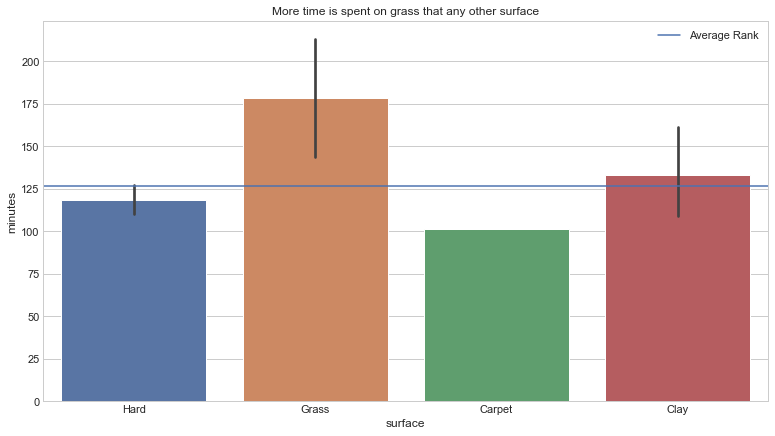

In [41]:
plt.title("More time is spent on grass that any other surface")
sns.barplot(x="surface", y="minutes", data=r_vs_ndmr)
age_mean = r_vs_ndmr.minutes.mean()
plt.axhline(age_mean, label="Average Rank")
plt.legend()
plt.show()

________
#### Create a dataframe with players ranking  from the 1st IQR to the 3rd IQR

In [42]:
match.shape

(35967, 78)

In [69]:
df.sample()

,playerid,player_name,age,height,maxrank,hand,country,win_count,lose_count,match_count,win%,aces_in_match_lost,aces_in_match_won,ace_count,aces_per_game,first_serve_percentage_match_lost,first_serve_percentage_match_won,first_serve_won_percentage_match_lost,first_serve_won_percentage_match_won,breakpoints_won_match_lost,breakpoints_won_match_won,breakpoint_count,breakpoints_per_game,win_count_30,loss_count_30,win_count_100,loss_count_100,total_top30_matches,total_top100_matches,top_30_win%,top_100_win%,hard_surface_win,hard_surface_loss,hard_surface_match_count,hard_win%,clay_surface_win,clay_surface_loss,clay_surface_match_count,clay_win%,grass_surface_win,grass_surface_loss,grass_surface_match_count,grass_win%,carpet_surface_win,carpet_surface_loss,carpet_surface_match_count,carpet_win%
314,102179,antony_dupuis,28.542094,185.0,57.0,R,FRA,65.0,92.0,157.0,0.41,617.0,555.0,1172.0,7.465,0.582806,0.620538,0.676941,0.775013,134.0,194.0,328.0,2.089172,6.0,27.0,37.0,73.0,33.0,110.0,0.181818,0.336364,28.0,38.0,66.0,0.424242,16.0,31.0,47.0,0.340426,15.0,17.0,32.0,0.46875,6.0,6.0,12.0,0.5


In [ ]:
## just_roger = df[df['player_name'].isin(['roger_federer'])]
just_roger

In [87]:
# create 2 data frames with the limit rank we need 
pros_23_to_80   =  df[df['maxrank'].between(23, 80)]
pros_23_to_80.shape

(218, 47)

In [88]:
# Add roger stats to players rank 23 - 80
pros_23_to_80_and_roger = pros_23_to_80.append(just_roger)

In [92]:
# sort frame by max rank (Roger on top)
pros_23_to_80_and_roger = pros_23_to_80_and_roger.sort_values(by=['maxrank'])
# turn to csv 
pros_23_to_80_and_roger.to_csv('23_to_80_and_roger.csv')

In [ ]:
# create df of top rivals of Nadal
roger_and_rivals = df[df['player_name'].isin(['roger_federer', 'rafael_nadal', 'novak_djokovic', 'andy_murray'])]
roger_and_rivals

In [110]:
average_pro = pd.DataFrame(pros_23_to_80.mean())

In [124]:
list(pros_23_to_80_and_roger.player_name)

['roger_federer',
 'damir_dzumhur',
 'dusan_lajovic',
 'guillermo_garcia_lopez',
 'marc_rosset',
 'andrey_rublev',
 'hicham_arazi',
 'olivier_rochus',
 'jonas_bjorkman',
 'byron_black',
 'julien_benneteau',
 'karim_alami',
 'filippo_volandri',
 'martin_klizan',
 'jeremy_chardy',
 'vladimir_voltchkov',
 'mischa_zverev',
 'lukas_rosol',
 'fernando_meligeni',
 'victor_hanescu',
 'jason_stoltenberg',
 'potito_starace',
 'filip_krajinovic',
 'vasek_pospisil',
 'david_prinosil',
 'joao_sousa',
 'santiago_giraldo',
 'taylor_fritz',
 'frances_tiafoe',
 'bohdan_ulihrach',
 'dudi_sela',
 'ivan_dodig',
 'fernando_vicente',
 'harel_levy',
 'sergiy_stakhovsky',
 'kristof_vliegen',
 'magnus_gustafsson',
 'jan_lennard_struff',
 'federico_delbonis',
 'alex_bogomolov_jr',
 'paolo_lorenzi',
 'denis_istomin',
 'andrey_golubev',
 'andreas_beck',
 'andreas_vinciguerra',
 'yen_hsun_lu',
 'alberto_martin',
 'pablo_andujar',
 'luis_horna',
 'michel_kratochvil',
 'edouard_roger_vasselin',
 'marton_fucsovics',


---------
### Lets take a look only to Roger federe Vs Rafale Nadal


In [43]:
# lets take a look only Rafael Nadal vs Roger Federer by creating a new df 
n_vs_r1 = roger[roger['player_1'] == 'Rafael Nadal']
n_vs_r2 = roger[roger['player_2'] == 'Rafael Nadal']
n_vs_r  = pd.concat([n_vs_r1, n_vs_r2])


In [44]:
n_vs_r.head(35)

,tourney_id,tourney_name,surface,draw_size,tourney_level,match_num,score,best_of,round,minutes,player_1,player_2,player_1_age,player_2_age,player_1_hand,player_2_hand,player_1_ht,player_2_ht,player_1_id,player_2_id,player_1_ioc,player_2_ioc,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,player_1_aces,player_2_aces,player_1_double_faults,player_2_double_faults,player_1_service_points,player_2_service_points,player_1_first_serves_in,player_2_first_serves_in,player_1_first_serve_points_won,player_2_first_serve_points_won,player_1_second_serve_points_won,player_2_second_serve_points_won,player_1_service_game_total,player_2_service_game_total,player_1_break_points_saved,player_2_break_points_saved,player_1_break_points_faced,player_2_break_points_faced,winner,player_1_first_serve_%,player_2_first_serve_%,player_1_first_serve_win_%,player_2_first_serve_win_%,player_1_break_points_won,player_2_break_points_won,player_1_wins,player_1_seeded,player_2_seeded,surface_Carpet,surface_Clay,surface_Grass,surface_Hard,tourney_level_A,tourney_level_D,tourney_level_F,tourney_level_G,tourney_level_M,player_1_hand_L,player_1_hand_R,player_2_hand_L,player_2_hand_R,round_ER,round_F,round_QF,round_R128,round_R16,round_R32,round_R64,round_RR,round_SF
tourney_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2004-03-22,2004-403,Miami Masters,Hard,96,M,65,6-3 6-3,3,R32,70.0,Rafael Nadal,Roger Federer,17.801506,22.620123,L,R,185.0,185.0,104745,103819,ESP,SUI,34.0,1.0,973.0,5635.0,32.0,1.0,1.0,8.0,2.0,2.0,48.0,56.0,39.0,34.0,31.0,21.0,5.0,13.0,9.0,9.0,0.0,4.0,0.0,7.0,Rafael Nadal,0.812500,0.607143,0.794872,0.617647,3.0,0.0,True,True,True,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0
2006-04-17,2006-410,Monte Carlo Masters,Clay,64,M,63,6-2 6-7(2) 6-3 7-6(5),5,F,230.0,Rafael Nadal,Roger Federer,19.871321,24.689938,L,R,185.0,185.0,104745,103819,ESP,SUI,2.0,1.0,4135.0,6810.0,2.0,1.0,1.0,3.0,4.0,3.0,152.0,143.0,106.0,86.0,70.0,54.0,24.0,28.0,21.0,20.0,14.0,7.0,18.0,14.0,Rafael Nadal,0.697368,0.601399,0.660377,0.627907,7.0,4.0,True,True,True,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0
2006-05-08,2006-416,Rome Masters,Clay,64,M,63,6-7(0) 7-6(5) 6-4 2-6 7-6(5),5,F,305.0,Rafael Nadal,Roger Federer,19.928816,24.747433,L,R,185.0,185.0,104745,103819,ESP,SUI,2.0,1.0,4135.0,7160.0,2.0,1.0,4.0,10.0,1.0,0.0,173.0,180.0,147.0,112.0,101.0,86.0,14.0,35.0,27.0,27.0,6.0,6.0,10.0,9.0,Rafael Nadal,0.849711,0.622222,0.687075,0.767857,3.0,4.0,True,True,True,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0
2006-05-29,2006-520,Roland Garros,Clay,128,G,127,1-6 6-1 6-4 7-6(4),5,F,182.0,Rafael Nadal,Roger Federer,19.986311,24.804928,L,R,185.0,185.0,104745,103819,ESP,SUI,2.0,1.0,4545.0,7010.0,2.0,1.0,3.0,8.0,0.0,1.0,111.0,119.0,85.0,72.0,59.0,49.0,17.0,25.0,18.0,18.0,7.0,8.0,10.0,12.0,Rafael Nadal,0.765766,0.605042,0.694118,0.680556,4.0,3.0,True,True,True,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0
2006-06-26,2006-540,Wimbledon,Grass,128,G,127,6-0 7-6(5) 6-7(2) 6-3,5,F,178.0,Rafael Nadal,Roger Federer,20.062971,24.881588,L,R,185.0,185.0,104745,103819,ESP,SUI,2.0,1.0,4545.0,7260.0,2.0,1.0,9.0,13.0,3.0,1.0,127.0,119.0,94.0,83.0,64.0,64.0,14.0,20.0,19.0,20.0,4.0,1.0,10.0,3.0,Roger Federer,0.740157,0.697479,0.680851,0.771084,2.0,6.0,False,True,True,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0
2006-11-13,2006-605,Masters Cup,Hard,8,F,4,6-4 7-5,3,SF,113.0,Rafael Nadal,Roger Federer,20.446270,25.264887,L,R,185.0,185.0,104745,103819,ESP,SUI,2.0,1.0,4270.0,7620.0,Unseeded,Unseeded,0.0,7.0,2.0,4.0,80.0,60.0,55.0,37.0,33.0,32.0,14.0,10.0,11.0,11.0,8.0,1.0,11.0,2.0,Roger Federer,0.687500,0.616667,0.600000,0.864865,1.0,3.0,False,False,False,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
2007-04-15,2007-410,Monte Carlo Masters,Clay,56,M,55,6-4 6-4,3,F,95.0,Rafael Nadal,Roger Federer,20.867899,25.686516,L,R,185.0,185.0,104745,103819,ESP,SUI,2.0,1.0,4875.0,7290.0,2.0,1.0,1.0,3.0,1.0,4.0,66.0,66.0,52.0,36.0,38.0,26.0,8.0,13.0,10.

In [45]:
# how many matches of Federer vs Nadal do we have in our data set
n_vs_r.shape

(30, 78)

In [46]:
n_vs_r.describe().T

,count,mean,std,min,25%,50%,75%,max
draw_size,30.0,77.600000,43.875686,8.000000,56.000000,64.000000,128.000000,128.000000
match_num,30.0,155.033333,292.051304,2.000000,55.000000,78.500000,127.000000,1602.000000
best_of,30.0,3.800000,0.996546,3.000000,3.000000,3.000000,5.000000,5.000000
minutes,30.0,139.300000,67.924984,59.000000,86.750000,119.000000,181.000000,305.000000
player_1_age,30.0,24.353365,4.206338,17.801506,20.954141,23.282683,27.130048,33.075975
player_2_age,30.0,29.171983,4.206338,22.620123,25.772758,28.101300,31.948665,37.894593
player_1_ht,30.0,185.000000,0.000000,185.000000,185.000000,185.000000,185.000000,185.000000
player_2_ht,30.0,185.000000,0.000000,185.000000,185.000000,185.000000,185.000000,185.000000
player_1_id,30.0,104745.000000,0.000000,104745.000000,104745.000000,104745.000000,104745.000000,104745.000000
player_2_id,30.0,103819.000000,0.000000,103819.000000,103819.000000,103819.000000,103819.000000,103819.000000


In [47]:
n_vs_r.mean().diff()

draw_size              NaN
match_num        77.433333
best_of        -151.233333
minutes         135.500000
player_1_age   -114.946635
                   ...    
round_R16         0.000000
round_R32         0.033333
round_R64        -0.033333
round_RR          0.033333
round_SF          0.233333
Length: 63, dtype: float64

In [48]:
print(f'Games in clay: {n_vs_r.surface_Clay.value_counts()[1]}')
print(f'Games in grass: {n_vs_r.surface_Grass.value_counts()[1]}')
print(f'Games in Hard: {n_vs_r.surface.value_counts()[0]}')

Games in clay: 12
Games in grass: 3
Games in Hard: 15


In [49]:
# Rafael nadal has won 19 of 30 games 
n_vs_r.winner.value_counts()

Rafael Nadal     19
Roger Federer    11
Name: winner, dtype: int64

In [50]:
# longest game
n_vs_r[n_vs_r.minutes == n_vs_r.minutes.max()]

,tourney_id,tourney_name,surface,draw_size,tourney_level,match_num,score,best_of,round,minutes,player_1,player_2,player_1_age,player_2_age,player_1_hand,player_2_hand,player_1_ht,player_2_ht,player_1_id,player_2_id,player_1_ioc,player_2_ioc,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,player_1_aces,player_2_aces,player_1_double_faults,player_2_double_faults,player_1_service_points,player_2_service_points,player_1_first_serves_in,player_2_first_serves_in,player_1_first_serve_points_won,player_2_first_serve_points_won,player_1_second_serve_points_won,player_2_second_serve_points_won,player_1_service_game_total,player_2_service_game_total,player_1_break_points_saved,player_2_break_points_saved,player_1_break_points_faced,player_2_break_points_faced,winner,player_1_first_serve_%,player_2_first_serve_%,player_1_first_serve_win_%,player_2_first_serve_win_%,player_1_break_points_won,player_2_break_points_won,player_1_wins,player_1_seeded,player_2_seeded,surface_Carpet,surface_Clay,surface_Grass,surface_Hard,tourney_level_A,tourney_level_D,tourney_level_F,tourney_level_G,tourney_level_M,player_1_hand_L,player_1_hand_R,player_2_hand_L,player_2_hand_R,round_ER,round_F,round_QF,round_R128,round_R16,round_R32,round_R64,round_RR,round_SF
tourney_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2006-05-08,2006-416,Rome Masters,Clay,64,M,63,6-7(0) 7-6(5) 6-4 2-6 7-6(5),5,F,305.0,Rafael Nadal,Roger Federer,19.928816,24.747433,L,R,185.0,185.0,104745,103819,ESP,SUI,2.0,1.0,4135.0,7160.0,2.0,1.0,4.0,10.0,1.0,0.0,173.0,180.0,147.0,112.0,101.0,86.0,14.0,35.0,27.0,27.0,6.0,6.0,10.0,9.0,Rafael Nadal,0.849711,0.622222,0.687075,0.767857,3.0,4.0,True,True,True,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0


In [51]:
# shortes game 
n_vs_r[n_vs_r.minutes == n_vs_r.minutes.min()]

,tourney_id,tourney_name,surface,draw_size,tourney_level,match_num,score,best_of,round,minutes,player_1,player_2,player_1_age,player_2_age,player_1_hand,player_2_hand,player_1_ht,player_2_ht,player_1_id,player_2_id,player_1_ioc,player_2_ioc,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,player_1_aces,player_2_aces,player_1_double_faults,player_2_double_faults,player_1_service_points,player_2_service_points,player_1_first_serves_in,player_2_first_serves_in,player_1_first_serve_points_won,player_2_first_serve_points_won,player_1_second_serve_points_won,player_2_second_serve_points_won,player_1_service_game_total,player_2_service_game_total,player_1_break_points_saved,player_2_break_points_saved,player_1_break_points_faced,player_2_break_points_faced,winner,player_1_first_serve_%,player_2_first_serve_%,player_1_first_serve_win_%,player_2_first_serve_win_%,player_1_break_points_won,player_2_break_points_won,player_1_wins,player_1_seeded,player_2_seeded,surface_Carpet,surface_Clay,surface_Grass,surface_Hard,tourney_level_A,tourney_level_D,tourney_level_F,tourney_level_G,tourney_level_M,player_1_hand_L,player_1_hand_R,player_2_hand_L,player_2_hand_R,round_ER,round_F,round_QF,round_R128,round_R16,round_R32,round_R64,round_RR,round_SF
tourney_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2007-11-12,2007-605,Masters Cup,Hard,8,F,4,6-4 6-1,3,SF,59.0,Rafael Nadal,Roger Federer,21.442847,26.261465,L,R,185.0,185.0,104745,103819,ESP,SUI,2.0,1.0,5535.0,6530.0,Unseeded,Unseeded,1.0,11.0,1.0,0.0,39.0,48.0,28.0,39.0,17.0,32.0,6.0,5.0,8.0,9.0,1.0,1.0,4.0,1.0,Roger Federer,0.717949,0.8125,0.607143,0.820513,0.0,3.0,False,False,False,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1


In [52]:
# Average double faults per match faced 
print(f'Nadal  average double points = {round(n_vs_r.player_1_double_faults.mean(), 3)}')
print(f'Federe average double points = {round(n_vs_r.player_2_double_faults.mean(), 3)}')

Nadal  average double points = 1.633
Federe average double points = 1.267


In [53]:
# Average service points points 
print(f'Nadal  average service points = {round(n_vs_r.player_1_service_points.mean(), 3)}')
print(f'Federe average service points = {round(n_vs_r.player_2_service_points.mean(), 3)}')

Nadal  average service points = 92.4
Federe average service points = 93.333


In [54]:
# Average verage first serve points won
print(f'Nadal  average first serve points won = {round(n_vs_r.player_1_first_serve_points_won.mean(), 3)}')
print(f'Federe average first serve points won = {round(n_vs_r.player_2_first_serve_points_won.mean(), 3)}')

Nadal  average first serve points won = 45.7
Federe average first serve points won = 41.033


In [55]:
# Average verage first serve points won
print(f'Nadal  average seconnd serve points won = {round(n_vs_r.player_1_second_serve_points_won.mean(), 3)}')
print(f'Federe average seconnd serve points won = {round(n_vs_r.player_2_second_serve_points_won.mean(), 3)}')

Nadal  average seconnd serve points won = 13.367
Federe average seconnd serve points won = 17.067


In [56]:
# Average verage first serve points won
print(f'Nadal  average service game total = {round(n_vs_r.player_1_service_game_total.mean(), 3)}')
print(f'Federe average service game total = {round(n_vs_r.player_2_service_game_total.mean(), 3)}')

Nadal  average service game total = 14.433
Federe average service game total = 14.533


In [57]:
# Average verage first serve points won
print(f'Nadal  average aces per game = {round(n_vs_r.player_1_aces.mean(), 3)}')
print(f'Federe average aces per game = {round(n_vs_r.player_2_aces.mean(), 3)}')

Nadal  average aces per game = 2.4
Federe average aces per game = 8.2


In [58]:
for col in n_vs_r:
    print(n_vs_r[col].value_counts())
    

2013-404     1
2006-605     1
2006-410     1
2006-540     1
2007-414     1
2007-520     1
2008-540     1
2007-410     1
2013-416     1
2007-605     1
2013-605     1
2008-414     1
2017-5014    1
2008-410     1
2015-328     1
2017-580     1
2008-520     1
2006-520     1
2011-403     1
2019-520     1
2014-580     1
2004-403     1
2010-605     1
2006-416     1
2019-540     1
2013-422     1
2009-580     1
2012-404     1
2011-605     1
2010-1536    1
Name: tourney_id, dtype: int64
Roland Garros           4
Wimbledon               3
Monte Carlo Masters     3
Australian Open         3
Tour Finals             3
Indian Wells Masters    2
Miami Masters           2
Hamburg Masters         2
Rome Masters            2
Masters Cup             2
Cincinnati Masters      1
Shanghai Masters        1
Basel                   1
Madrid Masters          1
Name: tourney_name, dtype: int64
Hard     15
Clay     12
Grass     3
Name: surface, dtype: int64
128    10
56      7
96      4
8       4
64      3
32      

# TAKEAWAYS 
- We are missing about 10 games ==> 9 are exivition 1 in miami 2005 
- Nadal is about 5 years younguer than Federer 
- They use different hands. We have prooven that lefthanded players have a slight advantage over righthanded players
- They both are equally tall at 185cm
- Players have never played on carpet
- Face each other in the rank of Roland Garros 4 times
- In tourney level M 14 times and in Finals 5 times 
- Their longest game lasted 305 minutes and Rafael Nadal won 
- Their shortest games lasted 59 minutes, and Roger Federer won 
- Roger Feder has maintained the highest rank amongst their matches 
- Nadal had aces in every game against Federer. 
- Nadal had 2 games where he had 20 aces or more against Federer. Anything above 18 is an outlier
- Federer had 5 games where he had 0 aces and 10 where he only had 1 ace against Nadal. The most aces he was able to score were only 10 
- In Average, Federer is safer with his serve. He has a lower average double fault in their games
- Nadal has a little more double faults but has a lot more aces than Federer. could this be correlated
- Federer gets abount one more service poitn in avergage than Nadal in the 30 games 

- Nadal has won 63% of the matches  

### Notes
- Try to graph Aces to compare 
- double faults and aces are correlated. (check), the more aces in tennis, the more double faults?

player_1_name = Rafael Nadal    30
player_2_name = Roger Federer    30


In [59]:
n_vs_r.mean()

draw_size        77.600000
match_num       155.033333
best_of           3.800000
minutes         139.300000
player_1_age     24.353365
                   ...    
round_R16         0.000000
round_R32         0.033333
round_R64         0.000000
round_RR          0.033333
round_SF          0.266667
Length: 63, dtype: float64

In [60]:
n_vs_r.player_1_aces.value_counts()

1.0     10
0.0      5
3.0      5
4.0      4
2.0      3
6.0      1
10.0     1
9.0      1
Name: player_1_aces, dtype: int64

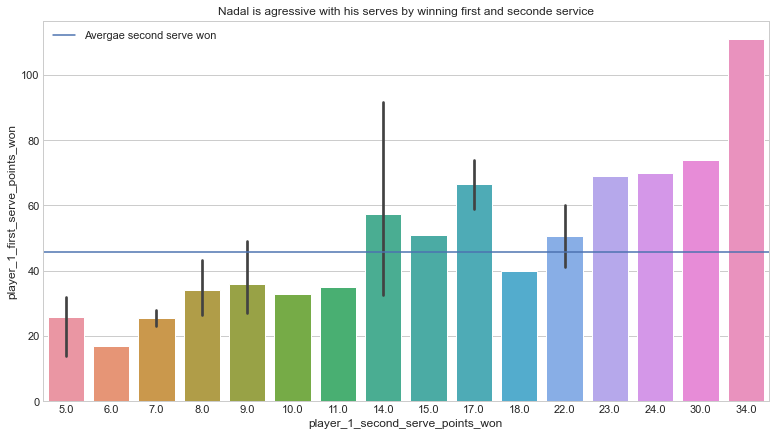

In [61]:
plt.title("Nadal is agressive with his serves by winning first and seconde service")
sns.barplot(x="player_1_second_serve_points_won", y="player_1_first_serve_points_won", data=n_vs_r)
second_serve_points_won_mean = n_vs_r.player_1_first_serve_points_won.mean()
plt.axhline(second_serve_points_won_mean, label="Avergae second serve won")
plt.legend()
plt.show()

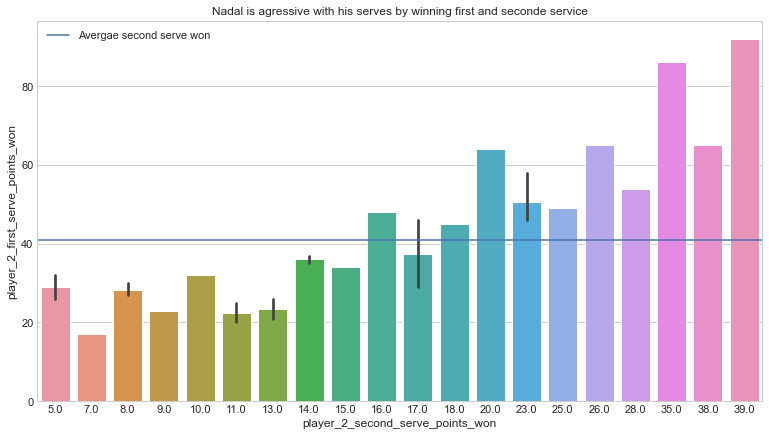

In [62]:
plt.title("Nadal is agressive with his serves by winning first and seconde service")
sns.barplot(x="player_2_second_serve_points_won", y="player_2_first_serve_points_won", data=n_vs_r)
second_serve_points_won_mean = n_vs_r.player_2_first_serve_points_won.mean()
plt.axhline(second_serve_points_won_mean, label="Avergae second serve won")
plt.legend()
plt.show()

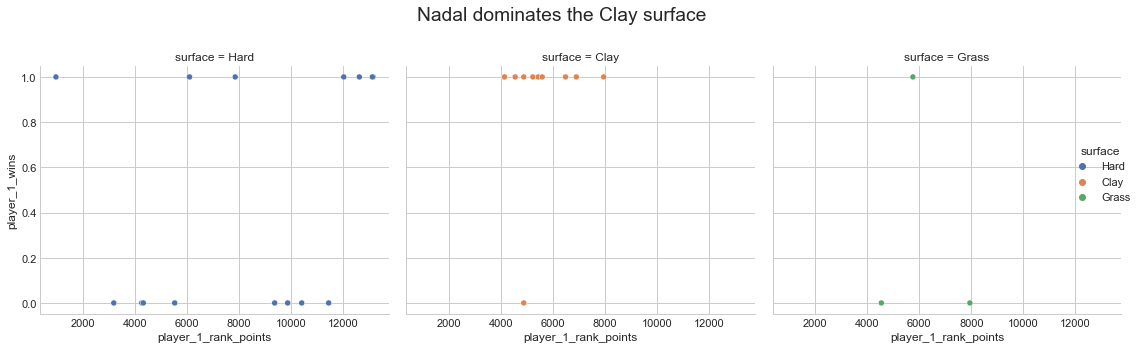

In [63]:
# By comparing surface type used by both players, we can see that Nadal dominates clay 
rel = sns.relplot(x='player_1_rank_points', y='player_1_wins', data=n_vs_r, col="surface", hue="surface")
rel.fig.suptitle('Nadal dominates the Clay surface ') # One way to title a relplot
plt.tight_layout()

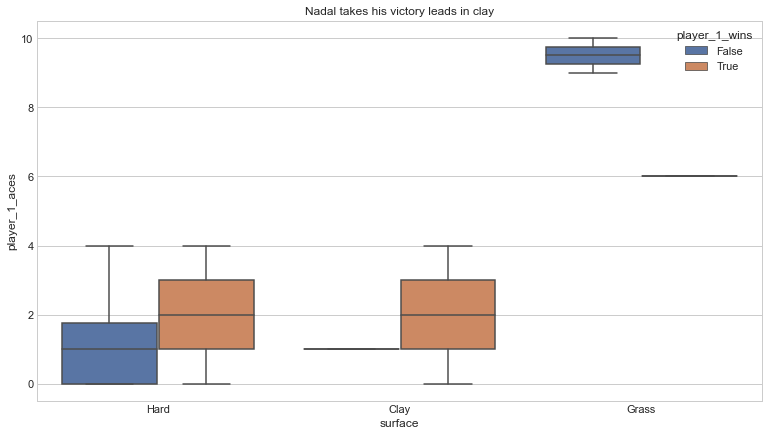

In [64]:
# At each class ticket, women have better survival rates
plt.title("Nadal takes his victory leads in clay")
sns.boxplot(x="surface", y="player_1_aces", data=n_vs_r, hue="player_1_wins")
plt.show()

- Nadal has only lose one game in clay 

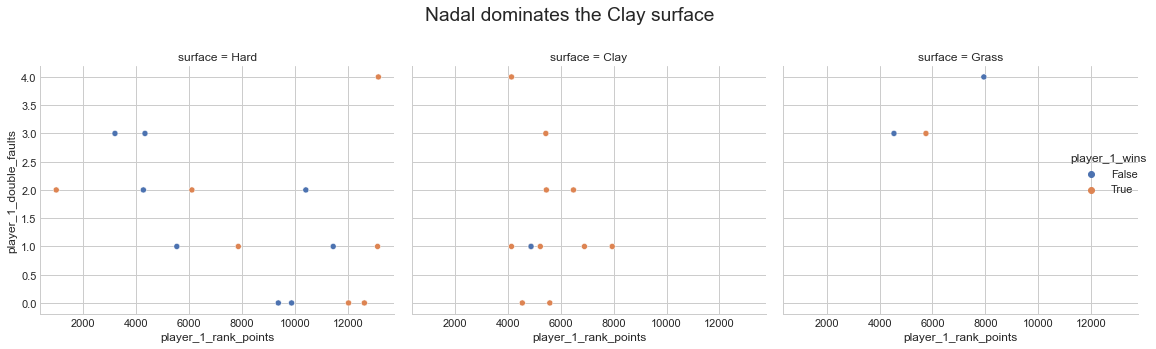

In [65]:
# By comparing surface type used by both players, we can see that Nadal dominates clay 
rel = sns.relplot(x='player_1_rank_points', y='player_1_double_faults', data=n_vs_r, col="surface", hue="player_1_wins")
rel.fig.suptitle('Nadal dominates the Clay surface ') # One way to title a relplot
plt.tight_layout()

In [66]:
def get_winning_player_rank_points(n_vs_r):
    '''This function: 
     gets graph of average player ranking points for Murray wins and Federer wins'''

    # create axis object
    fig, (ax1,ax2) = plt.subplots(1,2)
    
    # assign values and labels for ax1
    values = [n_vs_r.player_1_rank_points[(n_vs_r.player_1_wins == True)].mean(), n_vs_r.player_1_rank_points[(n_vs_r.player_1_wins == False)].mean()]
    labels = ['Wins','Losses']

    # generate and display graph
    ax1.bar(height=values, x=labels, color=['#dfff4f', '#3C638E'])
    ax1.title.set_text("Nadal's Mean Rank Points")
   
    # assign values and labels for ax2
    values = [n_vs_r.player_2_rank_points[(n_vs_r.player_1_wins == False)].mean(), n_vs_r.player_2_rank_points[(n_vs_r.player_1_wins == True)].mean()]
    labels = ['Wins','Losses']

    # generate and display graph
    ax2.bar(height=values, x=labels, color=['#dfff4f', '#3C638E'])
    ax2.title.set_text("Federer's Mean Rank Points")
   
    # display plot
    plt.tight_layout()
    plt.show()

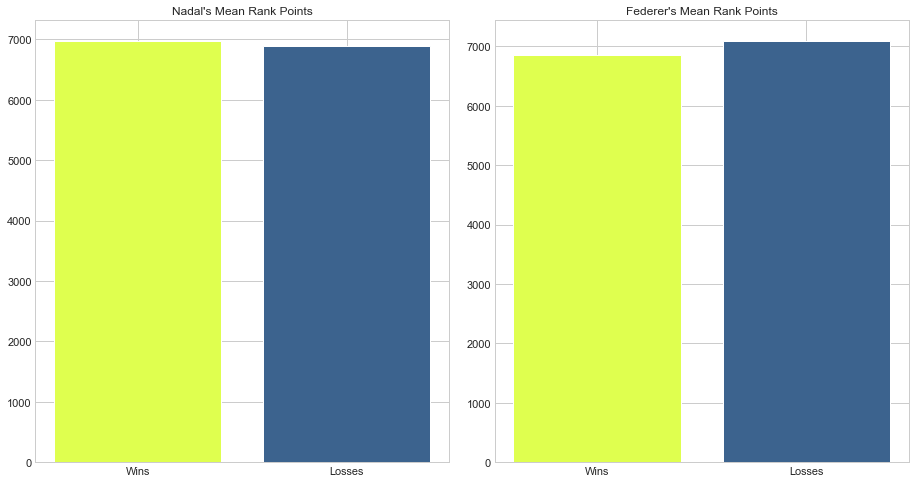

In [67]:
get_winning_player_rank_points(n_vs_r)

### END of Federer vs Nadal
---------------------------

In [68]:
# # pie chart by Chole
# def get_pie_tourney_level(fed_v_mur1):
#     '''get pie chart of player win percentage for each tourney level'''

#     # activate subplots objects
#     fig, axs = plt.subplots(2, 2, figsize=(10,8))

#     # list of charts to be generated
#     levels = ['A', 'F', 'G', 'M']

#     # generate graphs and assign them to subplots
#     for level, ax in zip(levels, axs.ravel()):
        
#         values = [len(fed_v_mur1.player_1_wins[(fed_v_mur1.player_1_wins == True) & (fed_v_mur1.tourney_level == level)]), len(fed_v_mur1.player_1_wins[(fed_v_mur1.player_1_wins == False) & (fed_v_mur1.tourney_level == level)])] 
#         labels = ['Murray Wins','Federer Wins']
        
#         ax.pie(values, labels=labels, autopct='%.0f%%', colors=['#dfff4f', '#3C638E'])
#         ax.set_title(f'Win Percentage for tourney {level}')
    
#     # display chart
#     plt.tight_layout()
#     plt.show()